# Exploratory Analysis of Agricultural CO2 Emissions: Understanding the Environmental Impact of the Agri-Food Sector

Chloe Miao, Hanlin Chen, Mengzheng Zhang, Isabel Arvelo

# Importing Libraries 

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import numpy as np
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np 
import seaborn as sns
import matplotlib.ticker as ticker

# Reading in Data 

**Geographic Country Data**

In [124]:
# import world df fromm geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Replace 'path_to_shapefile' with the path to your .shp file.
shapefile_path = "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
gdf = gpd.read_file(shapefile_path)

# Selecting and renaming columns
world = gdf[['SOVEREIGNT', 'geometry']].copy()


world.rename(columns={
    'SOVEREIGNT': 'name',
}, inplace=True)

#Exclude Antartica
world = world[(world.name != "Antarctica")]

**Vulnerability Data**

Vulnerability Score: The ND-GAIN Vulnerability Index aims to measure a country's susceptibility to climate change and other global challenges in combination with its readiness to improve resilience. It's intended to help businesses, policymakers, and the general public understand where and how to most effectively enhance resilience to climate change. The vulnerability score assesses a country's exposure, sensitivity, and capacity to adapt to climate change impacts. It includes factors like health, food, water, ecosystem services, human habitat, and infrastructure. The index uses a wide range of data from various global sources. It combines these data points into a comprehensive scoring system, providing a comparative analysis of different countries.

In [125]:
vulnerability_df = pd.read_csv('data/vulnerability.csv')

**Agri-food CO2 emission dataset**

The agricultural CO2 emission dataset has been constructed by merging and reprocessing approximately a dozen individual datasets from the Food and Agriculture Organization (FAO) and data from IPCC. The dataset, as demonstrated in the notebook, describes CO2 emissions related to agri-food, which amount to approximately 62% of the global annual emissions

In [126]:
fao_df = pd.read_csv("data/Agrofood_co2_emission.csv")

**Our World In Data GHG Emissions**

In [127]:
owid_df = pd.read_csv("data/owid-co2-data.csv")

## Data Cleaning

Consistent Country Names: We aimed to merge the Agri-food CO2 Emission dataset, ND-GAIN Vulnerability dataset, and Our World in Data with Natural Earth Data for a comprehensive geographic visualization of various climate metrics. To achieve this, it was critical to ensure a consistent naming convention across all datasets, particularly for the country names, which served as the key matching column.


To address potential discrepancies and enhance data uniformity, the initial step involved converting all country name columns in each dataset to lowercase to eliminate case sensitivity issues. Subsequently, for each dataset, we compiled a list of unique country names. The next phase involved a meticulous comparison of these country names with those in the Natural Earth geospatial data. This comparison utilized set subtraction to pinpoint mismatches. In instances where country names did not align, we employed string manipulation techniques to identify similar names within the datasets. This enabled me to methodically rename the countries, ensuring alignment and consistency across all datasets. This thorough process was instrumental in harmonizing the datasets, setting a solid foundation for our subsequent geographic analyses of climate metrics.

Consistent Emission Measurements: Agri-food CO2 emission dataset measures emissions in kilotonnes (kt) and the Our World in Data dataset measures emissions in million tonnes. Since one million tonnes is equal to one million metric tons, and one metric ton is equal to 1,000 kilotons, we convert the values in the Our World Dataset to kilotonnes by multiplying them by 1,000 as this measurement is mroe standard in the climate field. 

**Make Country Names Consistent Across All The Data Sets**

In [128]:
world['name'] = world['name'].str.lower()
unique_world_names = world['name'].unique()

In [129]:
owid_df['country'] = owid_df['country'].str.lower()
unique_owid_names = owid_df["country"].unique()

In [130]:
set(unique_world_names) - set(unique_owid_names)

{'democratic republic of the congo',
 'ivory coast',
 'northern cyprus',
 'republic of serbia',
 'republic of the congo',
 'somaliland',
 'the bahamas',
 'united republic of tanzania',
 'united states of america'}

In [131]:
# Consistent Country Names
owid_df.loc[owid_df["country"] == "democratic republic of congo", "country"] = "democratic republic of the congo"

owid_df.loc[owid_df["country"] == "cote d'ivoire", "country"] = "ivory coast"

owid_df.loc[owid_df["country"] == "serbia", "country"] = "republic of serbia"

owid_df.loc[owid_df["country"] == "congo", "country"] = "republic of the congo"

owid_df.loc[owid_df["country"] == "bahamas", "country"] = "the bahamas"

owid_df.loc[owid_df["country"] == "tanzania", "country"] = "nited republic of tanzania"

owid_df.loc[owid_df["country"] == "united states", "country"] = "united states of america"

In [132]:
# Lower case country names
fao_df['Area'] = fao_df['Area'].str.lower()
unique_fao_names = fao_df["Area"].unique()

In [133]:
set(unique_world_names) - set(unique_fao_names)

{'bolivia',
 'brunei',
 'east timor',
 'iran',
 'ivory coast',
 'kosovo',
 'laos',
 'moldova',
 'netherlands',
 'north korea',
 'northern cyprus',
 'republic of serbia',
 'republic of the congo',
 'russia',
 'somaliland',
 'south korea',
 'syria',
 'taiwan',
 'the bahamas',
 'turkey',
 'united kingdom',
 'venezuela',
 'vietnam'}

In [134]:
fao_df.loc[fao_df["Area"] == "bolivia (plurinational state of)", "Area"] = "bolivia"

fao_df.loc[fao_df["Area"] == 'brunei darussalam', "Area"] = "brunei"

fao_df.loc[fao_df["Area"] == 'timor-leste', "Area"] = "east timor"

fao_df.loc[fao_df["Area"] == 'iran (islamic republic of)', "Area"] = "iran"

fao_df.loc[fao_df["Area"] == "lao people's democratic republic", "Area"] = "laos"

fao_df.loc[fao_df["Area"] == "republic of moldova", "Area"] = "moldova"

fao_df.loc[fao_df["Area"] == "netherlands (kingdom of the)", "Area"] = "netherlands"

fao_df.loc[fao_df["Area"] == "democratic people's republic of korea", "Area"] = "north korea"

fao_df.loc[fao_df["Area"] == "serbia", "Area"] = "republic of serbia"

fao_df.loc[fao_df["Area"] == "serbia and montenegro", "Area"] = "republic of serbia"

fao_df.loc[fao_df["Area"] == "congo", "Area"] = "republic of the congo"

fao_df.loc[fao_df["Area"] == "russian federation", "Area"] = "russia"

fao_df.loc[fao_df["Area"] == "republic of korea", "Area"] = "south korea"

fao_df.loc[fao_df["Area"] == "syrian arab republic", "Area"] = "syria"

fao_df.loc[fao_df["Area"] == "china, taiwan province of", "Area"] = "taiwan"

fao_df.loc[fao_df["Area"] == "bahamas", "Area"] = "the bahamas"

fao_df.loc[fao_df["Area"] == "united kingdom of great britain and northern ireland", "Area"] = "united kingdom"

fao_df.loc[fao_df["Area"] == "viet nam", "Area"] = "vietnam"

fao_df.loc[fao_df["Area"] == "venezuela (bolivarian republic of)", "Area"] = "venezuela"



In [135]:
vulnerability_df['Name'] = vulnerability_df['Name'].str.lower()
unique_vulnerability_names = vulnerability_df['Name'].unique()

set(unique_world_names) - set(unique_vulnerability_names)

{'bolivia',
 'brunei',
 'czechia',
 'democratic republic of the congo',
 'east timor',
 'eswatini',
 'iran',
 'ivory coast',
 'kosovo',
 'laos',
 'libya',
 'moldova',
 'north korea',
 'north macedonia',
 'northern cyprus',
 'republic of serbia',
 'republic of the congo',
 'russia',
 'somaliland',
 'south korea',
 'south sudan',
 'syria',
 'taiwan',
 'the bahamas',
 'united republic of tanzania',
 'united states of america',
 'venezuela',
 'vietnam',
 'western sahara'}

In [136]:
vulnerability_df.loc[vulnerability_df["Name"] == "bolivia, plurinational state of", "Name"] = "bolivia"

vulnerability_df.loc[vulnerability_df["Name"] == "brunei darussalam", "Name"] = "brunei"

vulnerability_df.loc[vulnerability_df["Name"] == "czech republic", "Name"] = "czechia"

vulnerability_df.loc[vulnerability_df["Name"] == "congo, the democratic republic o", "Name"] = "democratic republic of the congo"

vulnerability_df.loc[vulnerability_df["Name"] == "timor-leste", "Name"] = "east timor"

vulnerability_df.loc[vulnerability_df["Name"] == "iran, islamic republic of", "Name"] = "iran"

vulnerability_df.loc[vulnerability_df["Name"] == "cote d'ivoire", "Name"] = "ivory coast"

vulnerability_df.loc[vulnerability_df["Name"] == "lao people's democratic republic", "Name"] = "laos"

vulnerability_df.loc[vulnerability_df["Name"] == "libyan arab jamahiriya", "Name"] = "libya"

vulnerability_df.loc[vulnerability_df["Name"] == "moldova, republic of", "Name"] = "moldova"

vulnerability_df.loc[vulnerability_df["Name"] == "korea, democratic people's repub", "Name"] = "north korea"

vulnerability_df.loc[vulnerability_df["Name"] == "macedonia", "Name"] = "north macedonia"

vulnerability_df.loc[vulnerability_df["Name"] == "congo", "Name"] = "republic of the congo"

vulnerability_df.loc[vulnerability_df["Name"] == "russian federation", "Name"] = "russia"

vulnerability_df.loc[vulnerability_df["Name"] == "korea, republic of", "Name"] = "south korea"

vulnerability_df.loc[vulnerability_df["Name"] == "syrian arab republic", "Name"] = "syria"

vulnerability_df.loc[vulnerability_df["Name"] == "bahamas", "Name"] = "the bahamas"

vulnerability_df.loc[vulnerability_df["Name"] == "tanzania, united republic of", "Name"] = "united republic of tanzania"

vulnerability_df.loc[vulnerability_df["Name"] == "united states", "Name"] = "united states of america"

vulnerability_df.loc[vulnerability_df["Name"] == "venezuela, bolivarian republic o", "Name"] = "venezuela"

vulnerability_df.loc[vulnerability_df["Name"] == "viet nam", "Name"] = "vietnam"

**Keeping co2 metrics consistent**

In [137]:
# convert from million tonnes to tonnes
owid_df["co2"] = owid_df["co2"] * 1000
owid_df["co2_including_luc"] = owid_df["co2_including_luc"] * 1000

In [138]:
# convert from tonnes per person to kilotonnes per person
owid_df["co2_per_capita"] = owid_df["co2_per_capita"] / 1000
owid_df["co2_including_luc_per_capita"] = owid_df["co2_including_luc_per_capita"] / 1000


**Defining new variables**

In [139]:
fao_df["Population"] = fao_df["Total Population - Male"] + fao_df["Total Population - Female"]
fao_df["per_capita_emission"] = fao_df["total_emission"]/fao_df["Population"]

**Filtering**

In [140]:
fao_df_2020 = fao_df[fao_df['Year'] == 2020]
owid_df_2020 = owid_df[owid_df['year'] == 2020]

**Merging**

In [141]:
merged_fao = world.set_index('name').join(fao_df_2020.set_index('Area'))
merged_owid = world.set_index('name').join(owid_df_2020.set_index('country'))
merged_vulnerability = world.set_index('name').join(vulnerability_df.set_index('Name'))

## Broad Data Exploration 

**Agri-food CO2 Emissions Dataset**

In [142]:
#fao_df.info()

In [143]:
fao_df.shape

(6965, 33)

In [144]:
fao_df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Population,per_capita_emission
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989,3.494410e+07,0.244698
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930,1.485462e+08,2.094199
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833,5.200000e+02,-0.020517
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333,4.081450e+05,0.001411
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300,4.895243e+06,0.003270
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750,1.817757e+07,0.012684
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083,1.456928e+09,36.364630


The dataset has 6965 observations from 235 unique countries between the years 1990 and 2020. 

An important notes is that several countries in the list represent the same geographic area but have different names over time due to various historical and political reasons. Here are some examples:

* Czechoslovakia and Czechia

* Yugoslavia SFR (Socialist Federal Republic of Yugoslavia) included multiple constituent republics, including Montenegro. Eventually, Yugoslavia dissolved into several independent countries. After the dissolution of Yugoslavia, Serbia and Montenegro formed a union called Serbia and Montenegro. However, this union eventually dissolved in 2006, leading to the independence of Montenegro as a separate country.

* Sudan was once a single country, but it split into two separate countries, Sudan and South Sudan, in 2011 after a referendum.

* USSR and Russia 

* Netherlands Antilles (former) refers to a former autonomous country within the Kingdom of the Netherlands that existed in the Caribbean Sea that no longer exists as a single entity

In [145]:
fao_df.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [146]:
fao_df[fao_df["Crop Residues"].isnull()]["Area"].unique()

array(['american samoa', 'andorra', 'anguilla', 'aruba', 'bahrain',
       'bermuda', 'british virgin islands', 'cayman islands',
       'channel islands', 'china, hong kong sar', 'china, macao sar',
       'cook islands', 'equatorial guinea', 'falkland islands (malvinas)',
       'gibraltar', 'greenland', 'guadeloupe', 'guam', 'holy see',
       'isle of man', 'kiribati', 'liechtenstein', 'marshall islands',
       'martinique', 'mayotte', 'monaco', 'montserrat', 'nauru',
       'netherlands antilles (former)', 'niue',
       'northern mariana islands', 'palau', 'palestine',
       'saint helena, ascension and tristan da cunha',
       'saint kitts and nevis', 'saint lucia',
       'saint pierre and miquelon', 'samoa', 'san marino', 'seychelles',
       'singapore', 'tokelau', 'tonga', 'turks and caicos islands',
       'tuvalu', 'united states virgin islands',
       'wallis and futuna islands', 'western sahara'], dtype=object)

In [147]:
# Which countries have the greatest sum of null values?
fao_df[fao_df["Crop Residues"].isnull()]["Area"].value_counts()


american samoa                                  31
liechtenstein                                   31
andorra                                         31
monaco                                          31
nauru                                           31
niue                                            31
saint helena, ascension and tristan da cunha    31
saint lucia                                     31
saint pierre and miquelon                       31
samoa                                           31
san marino                                      31
seychelles                                      31
singapore                                       31
tokelau                                         31
tonga                                           31
turks and caicos islands                        31
tuvalu                                          31
united states virgin islands                    31
wallis and futuna islands                       31
martinique                     

The data is fairly complete across most columns. Crop Residues, On-farm energy use, and Manure Management have thee greatest number of missing values, likely due to lack of data available in specific countries of periods of time. The countries with the greatest degree of missing data are relatively small or have specific geopolitical statuses. 

In [148]:
neg_emissions = fao_df[fao_df["total_emission"] < 0 ]

In [149]:
neg_emissions

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Population,per_capita_emission
707,bhutan,1990,1.4486,23.4914,9.0666,84.7288,0.0000,0.0,1.0543,-6609.6322,...,6.9061,3.5099,449228.0,88052.0,290974.0,267469.0,-1892.181051,0.055500,558443.0,-0.003388
708,bhutan,1991,1.4486,23.4914,8.7457,100.7723,0.0000,0.0,1.0543,-6609.6322,...,6.9061,3.5099,445083.0,92201.0,295431.0,272279.0,-1851.638551,-0.061000,567710.0,-0.003262
709,bhutan,1992,1.4486,23.4914,8.6256,96.3321,0.0000,0.0,1.0543,-6609.6322,...,6.9061,3.5099,436051.0,95474.0,283752.0,262192.0,-1868.130806,-0.225083,545944.0,-0.003422
710,bhutan,1993,1.4486,23.4914,9.2686,93.2613,0.0000,0.0,1.0543,-6609.6322,...,6.9061,3.5099,424820.0,98297.0,270365.0,250474.0,-1873.788306,-0.086500,520839.0,-0.003598
711,bhutan,1994,1.4486,23.4914,9.9070,90.2227,0.0000,1.0,1.4058,-6609.6322,...,6.9061,3.5099,415014.0,101489.0,270280.0,250980.0,-1829.281106,0.261833,521260.0,-0.003509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6782,vietnam,1995,199.3710,802.2657,1730.3083,33435.4815,3915.1474,542.0,776.2068,-77761.8027,...,244.6942,955.5980,58530406.0,16668571.0,36045251.0,37713859.0,-10319.221011,0.218167,73759110.0,-0.000140
6783,vietnam,1996,146.1755,613.7358,1825.0699,34612.6619,3911.7400,722.0,856.2544,-77761.8027,...,207.3687,1136.2053,59140514.0,17232205.0,36634171.0,38312278.0,-7818.504396,0.027333,74946449.0,-0.000104
6784,vietnam,1997,75.4725,455.7615,1885.5346,35086.5981,3917.6285,785.0,944.6143,-77761.8027,...,161.4647,1336.1754,59666524.0,17786811.0,37187435.0,38871168.0,-5595.490499,0.452833,76058603.0,-0.000074
6785,vietnam,1998,149.8806,1808.3603,1985.8283,36327.5350,3917.6277,540.0,999.1912,-77761.8027,...,461.6982,1314.4643,60117397.0,18335500.0,37722224.0,39406200.0,-3168.626171,1.266917,77128424.0,-0.000041


In [150]:
neg_emissions["Area"].value_counts().head(10)

bulgaria              30
chile                 30
bhutan                21
slovenia              19
russia                19
latvia                19
finland               16
uruguay               11
republic of serbia    10
vietnam               10
Name: Area, dtype: int64

In [151]:
neg_emissions["Year"].value_counts().head(10)

1998    11
1992    10
1993    10
1994    10
1995    10
1996    10
1997    10
1999     9
2011     9
2006     8
Name: Year, dtype: int64

There are 238 rows with negative emissions, mostly in the 1990s in countries that are heavily forested. 

**OWID Emissions Dataset**

In [152]:
#owid_df.info()

In [153]:
owid_df.shape

(50598, 79)

In [154]:
owid_df["country"].nunique()

278

In [155]:
owid_df["country"][owid_df["country"].str.contains("\(")].unique()

array(['africa (gcp)', 'asia (gcp)', 'asia (excl. china and india)',
       'central america (gcp)', 'europe (gcp)', 'europe (excl. eu-27)',
       'europe (excl. eu-28)', 'european union (27)',
       'european union (27) (gcp)', 'european union (28)',
       'french equatorial africa (gcp)',
       'french equatorial africa (jones et al. 2023)',
       'french west africa (gcp)',
       'french west africa (jones et al. 2023)',
       'kuwaiti oil fires (gcp)', 'kuwaiti oil fires (jones et al. 2023)',
       'least developed countries (jones et al. 2023)',
       'leeward islands (gcp)', 'leeward islands (jones et al. 2023)',
       'micronesia (country)', 'middle east (gcp)', 'non-oecd (gcp)',
       'north america (gcp)', 'north america (excl. usa)', 'oecd (gcp)',
       'oecd (jones et al. 2023)', 'oceania (gcp)',
       'panama canal zone (gcp)', 'panama canal zone (jones et al. 2023)',
       'ryukyu islands (gcp)', 'ryukyu islands (jones et al. 2023)',
       'saint martin (fre

In [156]:
owid_df["country"][owid_df["country"].str.contains("\(")].nunique()

36

There are 278 unique values in the country column, but only 242 represent distinct countries. The remaining 36 represent broader geographical or geopolitical categories, specific historical contexts, or unique research distinctions. 

## Evaluating Discrepancies 

In [157]:
# Select the rows and columns you want from each DataFrame
fao_subset = merged_fao[["Population"]]
owid_subset = merged_owid[["population"]]

fao_subset = fao_subset.copy()
owid_subset = owid_subset.copy()


# Rename columns for clarity
fao_subset.rename(columns={"Population": "FAO Population"}, inplace=True)
owid_subset.rename(columns={"population": "OWID Population"}, inplace=True)

# Concatenate DataFrames side by side
concatenated_df = pd.concat([fao_subset, owid_subset], axis=1)

# Calculate the difference in population
concatenated_df["Difference"] =  concatenated_df["FAO Population"] - concatenated_df["OWID Population"]

#Absolute difference
concatenated_df["Absolute Difference"] = concatenated_df["Difference"].abs()

# remove rows from concatenated with duplicate values for name 
concatenated_df = concatenated_df[~concatenated_df.index.duplicated(keep='first')]


In [158]:
concatenated_df.sort_values(by="Absolute Difference", ascending=False).head(10)

,FAO Population,OWID Population,Difference,Absolute Difference
china,1.456928e+09,1.424930e+09,31998695.0,31998695.0
india,1.396387e+09,1.396387e+09,55.0,55.0
indonesia,2.718580e+08,2.718580e+08,-13.0,13.0
peru,3.330476e+07,3.330477e+07,-13.0,13.0
iceland,3.666700e+05,3.666820e+05,-12.0,12.0
united states of america,3.359420e+08,3.359420e+08,-12.0,12.0
western sahara,5.560490e+05,5.560600e+05,-11.0,11.0
guinea-bissau,2.015828e+06,2.015839e+06,-11.0,11.0
montenegro,6.290470e+05,6.290580e+05,-11.0,11.0
brunei,4.417250e+05,4.417360e+05,-11.0,11.0


In [159]:
concatenated_df[concatenated_df["Absolute Difference"] == 0].shape

(14, 4)

In [160]:
# SI per capita emission divided by Belize per capita emission
0.076095/0.030276

2.5133769322235433

In [161]:
merged_fao.loc[merged_fao["per_capita_emission"] > merged_owid["co2_including_luc_per_capita"].max(), ["per_capita_emission", "total_emission", "Population"]]

,per_capita_emission,total_emission,Population
solomon islands,0.076095,52596.487701,691191.0


In [162]:
merged_owid.loc[merged_owid.index.isin(["solomon islands"]), ["co2_including_luc_per_capita", "co2_including_luc", "population"]]

,co2_including_luc_per_capita,co2_including_luc,population
solomon islands,0.008823,6098.0,691198.0


The total Agri-Food CO2 emissions in Solomon Islands is 113 times larger than the total emissions recorded in the OWID dataset. This does not make sense and could be worth looking into to understand where the discrepancy is coming from. We will exclude Solomon Islands fom the emission per capita analysis, as it is more than 2.5 times as large as the next highest per capita agri-food CO2 emiteer (Belize). 

## Visualizations 

### Geographic EDA

* Code Originator: Isa
* Code Reviewer: Nami
* Code Reviser: Chloe

Original data is skewed and makes it hard to distinguish the difference between most countries so we decided to apply a log transformation to better convey variation across the observations. 

In [163]:
merged_fao = merged_fao.copy() 
merged_fao["total_emission"] = merged_fao["total_emission"].apply(lambda x: np.nan if x <= 0 else x)
merged_fao["log_total_emission"] = np.log(merged_fao["total_emission"])

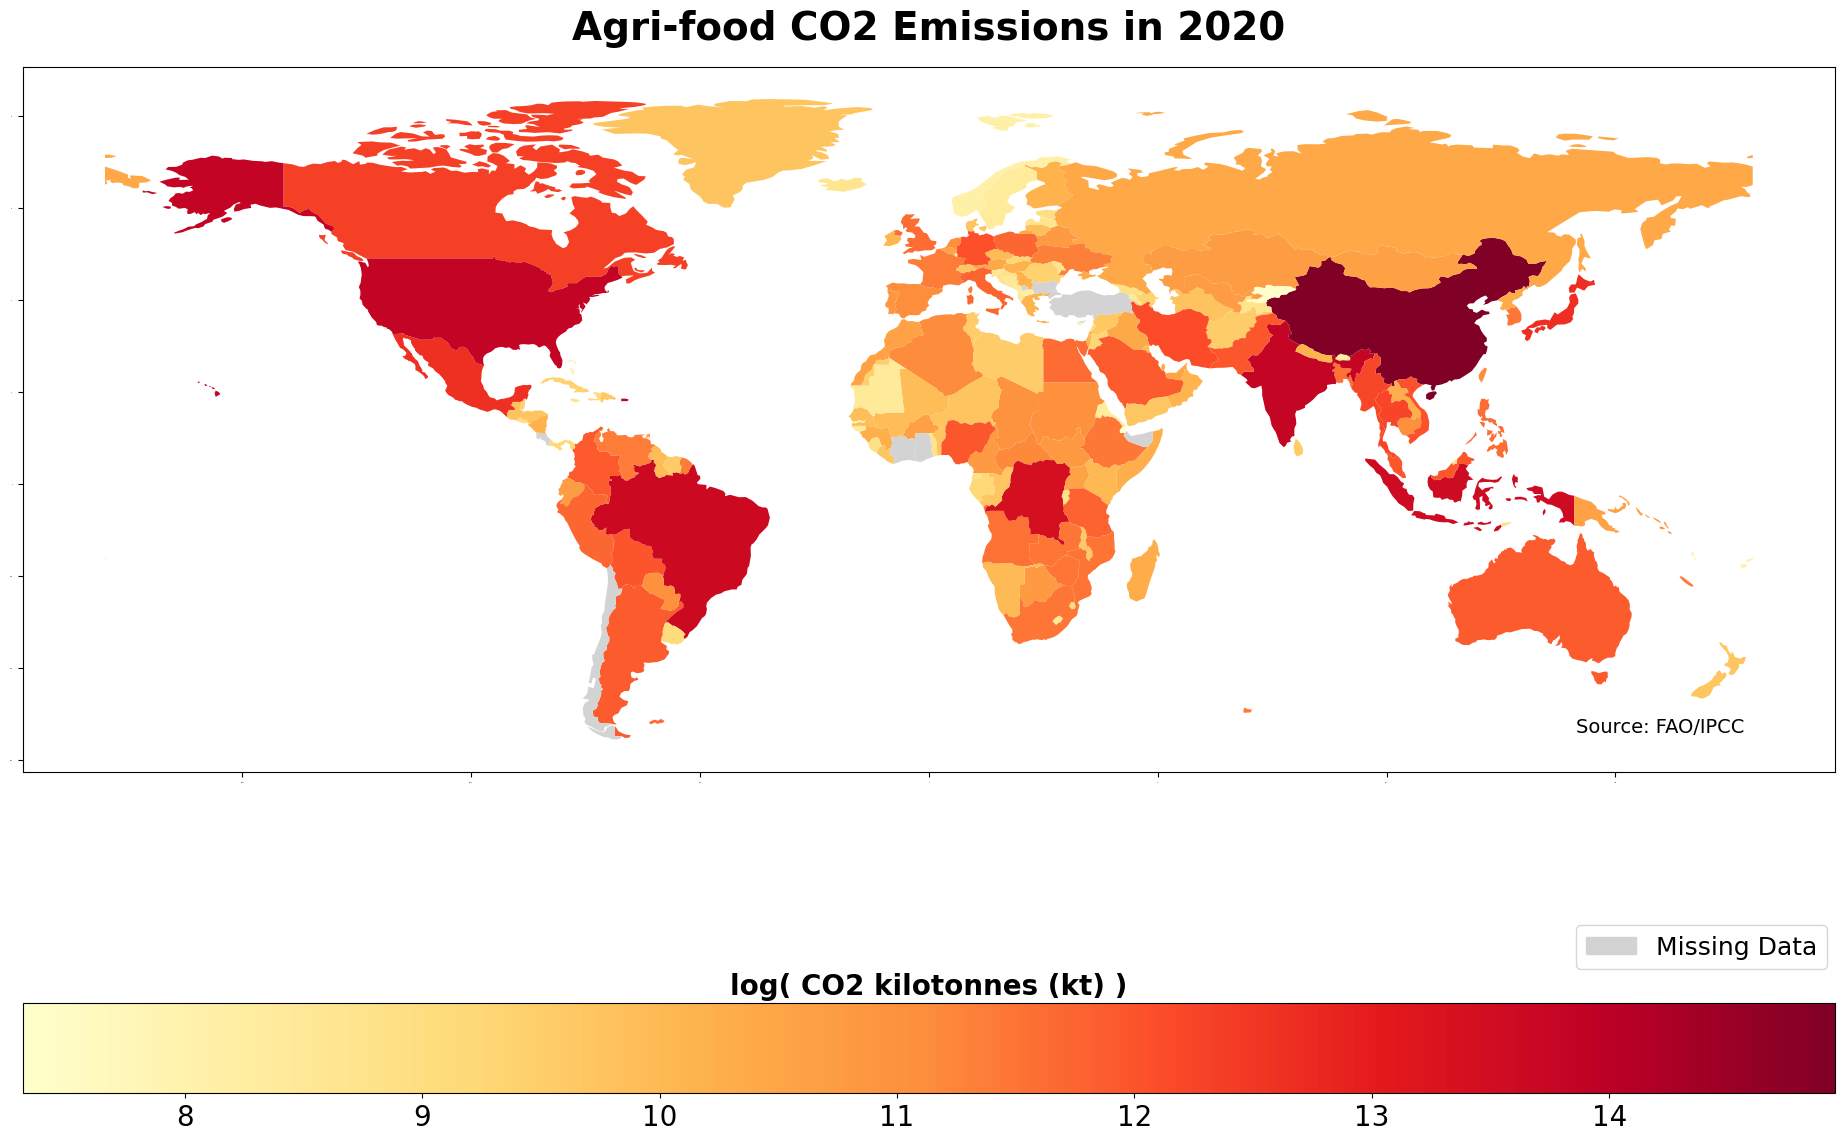

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(25, 20))
cmap = 'YlOrRd'

# Plotting the data with the custom colormap
merged_fao.plot(column="log_total_emission", ax=ax, legend=True,
                cmap=cmap,
                legend_kwds={'label': "",
                             'orientation': "horizontal"},
                missing_kwds={'color': 'lightgrey'})

plt.title("Agri-food CO2 Emissions in 2020", fontsize=28, fontweight='bold', pad=20)

# increase size of x and y ticks
ax.tick_params(axis='x', which='major', labelsize=0)
ax.tick_params(axis='y', which='major', labelsize=0)


# Adding axis labels for latitude and longitude


ax.text(0.95, 0.05, 'Source: FAO/IPCC', 
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=14)


cbar = ax.get_figure().get_axes()[1]
cbar.set_title("log( CO2 kilotonnes (kt) )", fontsize=20, fontweight='bold')
cbar.tick_params(labelsize=20)  # Set the size as needed
    
# Create a patch for the missing data
missing_data_patch = mpatches.Patch(color='lightgrey', label='Missing Data')

# Adjust the subplot parameters to leave space for the outside legend
fig.subplots_adjust(right=0.85)

# Create a legend for the missing data patch
# Adjust the bbox_to_anchor values to place the legend outside the figure
legend = ax.legend(handles=[missing_data_patch], labels=['Missing Data'], 
                   loc='upper left', bbox_to_anchor=(.85, -.2), fontsize=18)


# save figure
plt.savefig('plots/agri_food_co2_emissions.png', bbox_inches='tight')

In [165]:
merged_owid = merged_owid.copy() 
merged_owid["co2_including_luc"] = merged_owid["co2_including_luc"].apply(lambda x: np.nan if x <= 0 else x)
merged_owid["log_co2_including_luc"] = np.log(merged_owid["co2_including_luc"])

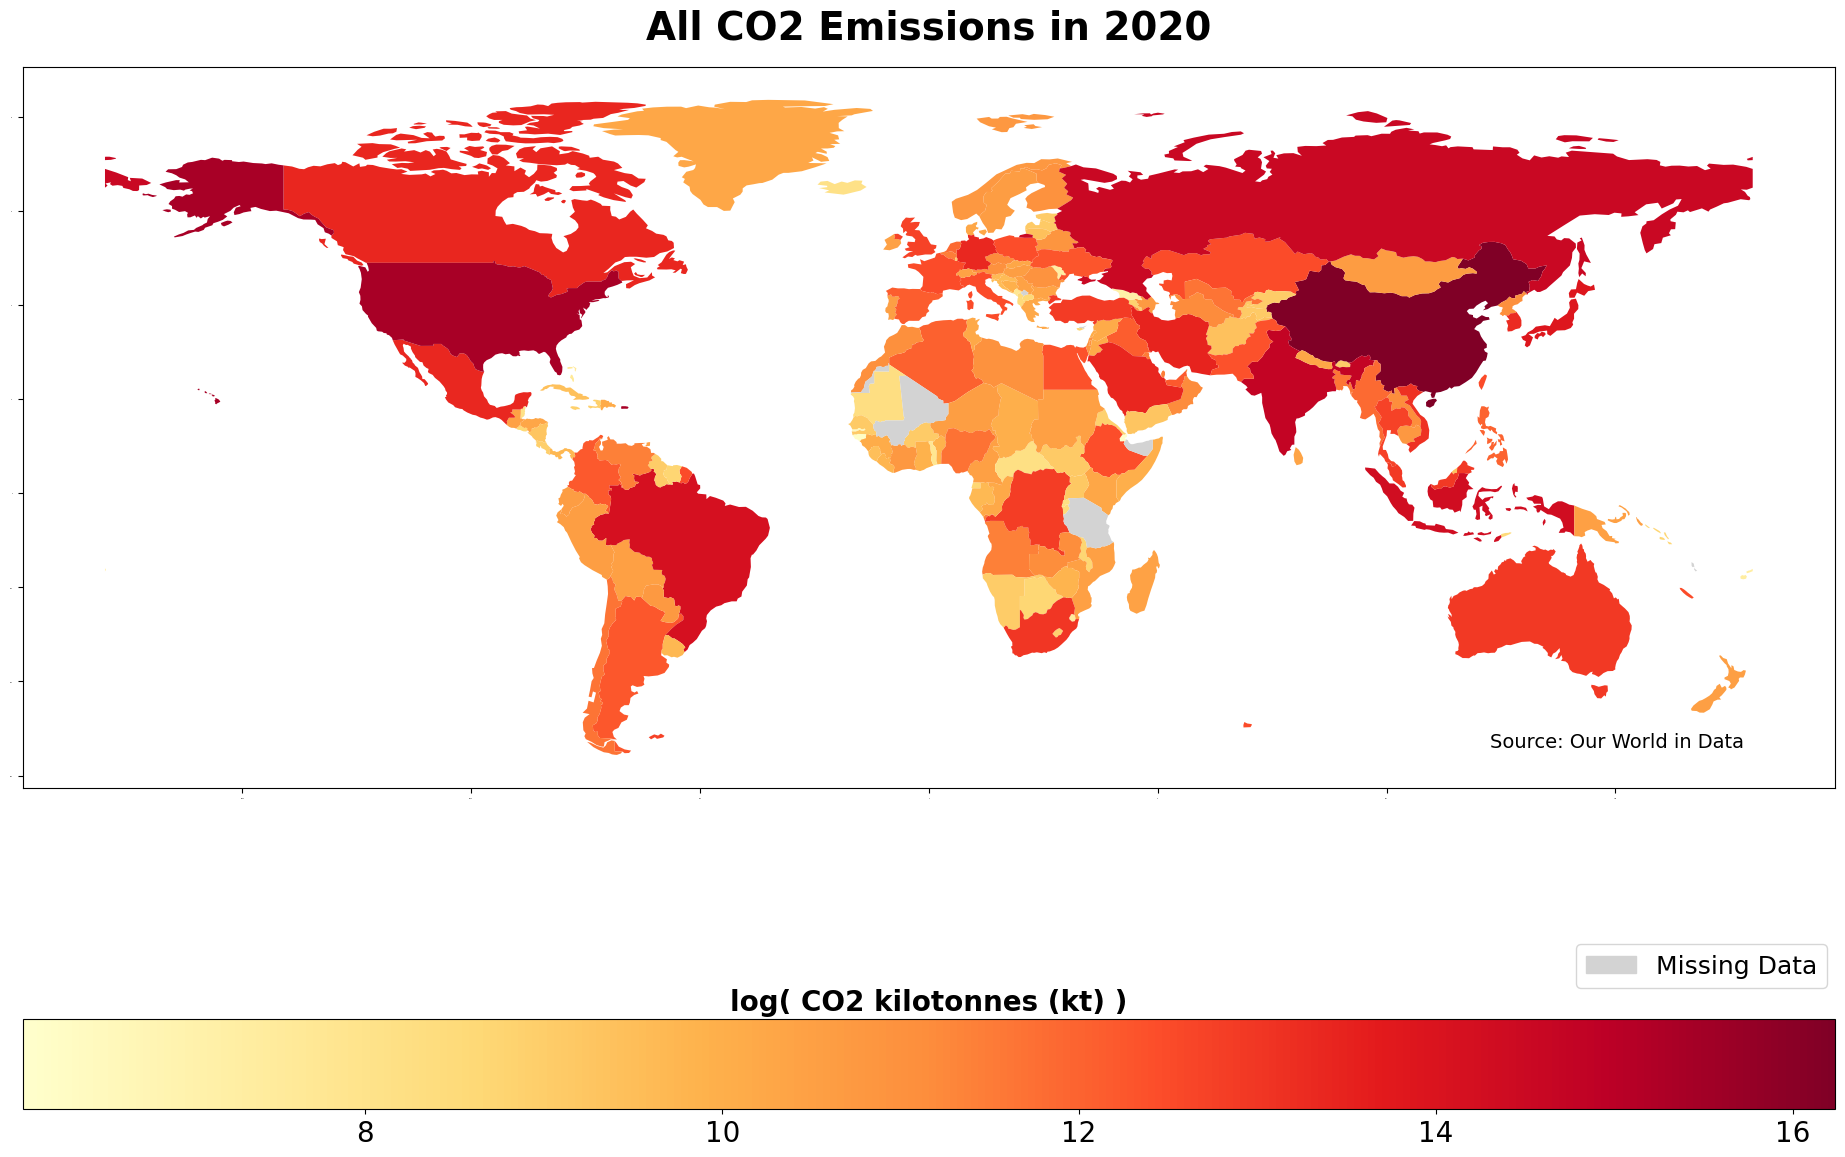

In [166]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, 1, figsize=(25, 20))
cmap = 'YlOrRd'

# Plotting the data with the custom colormap
merged_owid.plot(column="log_co2_including_luc", ax=ax, legend=True,
                cmap=cmap,
                legend_kwds={'label': "",
                             'orientation': "horizontal"},
                missing_kwds={'color': 'lightgrey'})

plt.title("All CO2 Emissions in 2020", fontsize=28, fontweight='bold', pad=20)

# increase size of x and y ticks
ax.tick_params(axis='x', which='major', labelsize=0)
ax.tick_params(axis='y', which='major', labelsize=0)


# Adding axis labels for latitude and longitude
ax.set_xlabel('', fontsize=20)
ax.set_ylabel('', fontsize=20)

ax.text(0.95, 0.05, 'Source: Our World in Data', 
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=14)


cbar = ax.get_figure().get_axes()[1]
cbar.set_title("log( CO2 kilotonnes (kt) )", fontsize=20, fontweight='bold')
cbar.tick_params(labelsize=20)  # Set the size as needed
    
# Create a patch for the missing data
missing_data_patch = mpatches.Patch(color='lightgrey', label='Missing Data')

# Adjust the subplot parameters to leave space for the outside legend
fig.subplots_adjust(right=0.85)

# Create a legend for the missing data patch
# Adjust the bbox_to_anchor values to place the legend outside the figure
legend = ax.legend(handles=[missing_data_patch], labels=['Missing Data'], 
                   loc='upper left', bbox_to_anchor=(.85, -.2), fontsize=18)

plt.savefig('plots/total_co2_emissions.png', bbox_inches='tight')

**Analysis**

Overall, the relative geographic distribution of agri-food CO2 emissions closely resembles the distribution for total carbon dioxide emissions, albeit at slightly different orders of magnitude, particularly at the top of the emissions hierarchy. China, the United States, and India consistently emerge as the top three emitters in both categories, underlining their significant contribution to global CO2 emissions.The United States and Russia stand out as major emitters in the total CO2 emissions map, indicating that industries other than agriculture contribute substantially to their overall CO2 footprint. Conversely, Brazil's prominent position in the agri-food emissions map, relative to its placement in the overall emissions ranking, suggests that its emissions are predominantly driven by the agri-food sector. This implies a lesser role for other emission-intensive industries.India shows a similar, though less pronounced, pattern to Brazil, with a significant agri-food emissions footprint relative to its overall emissions.

Russia, Saudi Arabia, and Iran rank within the top 10 for total emissions but not for agri-food emissions, highlighting the influence of industries other than agriculture in these countries. In contrast, the Democratic Republic of the Congo and Mexico feature in the top 10 for agri-food emissions but not for total emissions, underscoring the relative importance of agriculture in their emission profiles. Brazil, Japan, Canada, and Indonesia are notable for appearing in the top 10 emitters for both agri-food and overall CO2 emissions, indicating a significant environmental impact across multiple sectors.

While the analysis of overall and agri-food CO2 emissions provides valuable insights, it doesn't paint the full picture. Many major oil-producing nations have relatively small populations, resulting in lower total annual emissions. However, when viewed on a per capita basis, a different scenario emerges, often reflecting the correlation between high standards of living and a larger carbon footprint. To gain a comprehensive understanding, let's pivot to a per capita emission analysis, which will shed light on the individual contributions of countries to global emissions, taking into account their population sizes.

**Per Capita Emissions**

<Axes: >

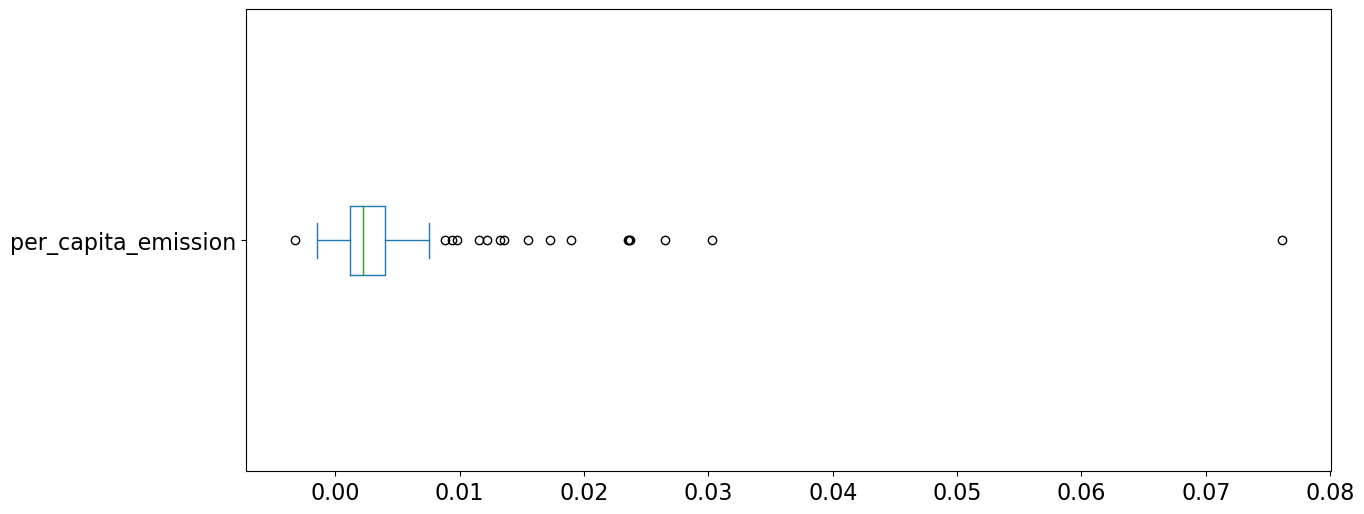

In [167]:
# boxplot of merged_fao_adjusted["per_capita_emission"]
merged_fao["per_capita_emission"].plot(kind='box', vert=False, figsize=(14,6))

<Axes: >

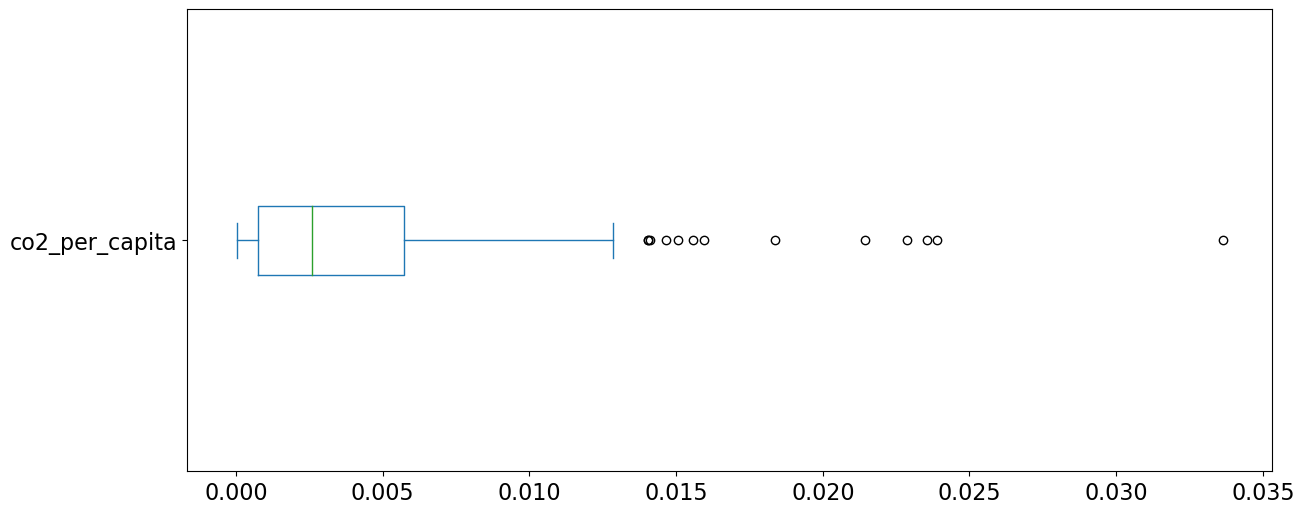

In [168]:
merged_owid["co2_per_capita"].plot(kind='box', vert=False, figsize=(14,6))

In [169]:
merged_owid.sort_values(by="co2_including_luc_per_capita", ascending=False).head(10)

,geometry,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,log_co2_including_luc
qatar,"POLYGON ((50.81011 24.75474, 50.74391 25.48242...",2020.0,QAT,2760390.0,NaN,1.572,0.569,92861.0,-8.292,-8.197,...,0.233,0.003,0.001,0.004,0.000,119.61,119.61,-21.722,-23.392,11.438859
brunei,"POLYGON ((115.45071 5.44773, 115.40570 4.95523...",2020.0,BRN,441736.0,NaN,0.000,0.000,10553.0,0.066,0.626,...,0.030,0.000,0.000,0.000,0.000,12.23,11.91,-0.592,-5.611,9.366404
trinidad and tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",2020.0,TTO,1518142.0,NaN,0.263,0.173,35756.0,-5.012,-12.294,...,0.095,0.001,0.001,0.002,0.000,26.61,26.48,-9.564,-26.748,10.478302
kuwait,"POLYGON ((47.97452 29.97582, 48.18319 29.53448...",2020.0,KWT,4360451.0,NaN,1.222,0.280,99779.0,-4.582,-4.390,...,0.197,0.002,0.002,0.003,0.000,135.89,135.90,-2.839,-2.845,11.510713
united arab emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",2020.0,ARE,9287286.0,NaN,5.728,0.617,199084.0,-9.411,-4.514,...,0.260,0.002,0.002,0.004,0.000,249.93,249.93,-14.750,-7.409,12.201301
saudi arabia,"POLYGON ((34.95604 29.35655, 36.06894 29.19749...",2020.0,SAU,35997108.0,NaN,25.593,0.711,661193.0,4.711,0.718,...,0.755,0.005,0.007,0.012,0.000,712.59,712.59,-3.249,-0.491,13.405010
canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2020.0,CAN,37888704.0,NaN,6.625,0.175,534864.0,-49.850,-8.526,...,2.088,0.005,0.026,0.033,0.001,731.54,677.71,-44.191,-8.262,13.390889
australia,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",2020.0,AUS,25670052.0,NaN,2.820,0.110,399922.0,-16.434,-3.947,...,1.552,0.008,0.014,0.025,0.003,585.42,571.90,-45.388,-11.349,12.935812
oman,"MULTIPOLYGON (((55.20834 22.70833, 55.23449 23...",2020.0,OMN,4543406.0,NaN,1.816,0.400,72506.0,0.329,0.456,...,0.128,0.001,0.001,0.002,0.000,95.10,95.08,-13.765,-18.984,11.196473
united states of america,"POLYGON ((-66.28243 18.51476, -65.77130 18.426...",2020.0,USA,335942016.0,NaN,40.688,0.121,4715691.0,-543.453,-10.333,...,17.466,0.035,0.230,0.277,0.011,5289.13,5505.18,481.707,10.215,15.388377


In [170]:
# rows in merged_owid with co2 in title
merged_owid.columns[merged_owid.columns.str.contains('co2')]


# measured in tonnes per person.

Index(['cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs',
       'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'flaring_co2',
       'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita',
       'land_use_change_co2', 'land_use_change_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'other_co2_per_capita', 'other_industry_co2',
       'share_global_cement_co2', 'share_global_co2

In [171]:
# log transform of co2_including_luc_per_capita
merged_owid = merged_owid.copy() 
merged_owid["co2_including_luc_per_capita"] = merged_owid["co2_including_luc_per_capita"].apply(lambda x: np.nan if x <= 0 else x)
merged_owid["log_co2_including_luc_per_capita"] = np.log(merged_owid["co2_including_luc_per_capita"])

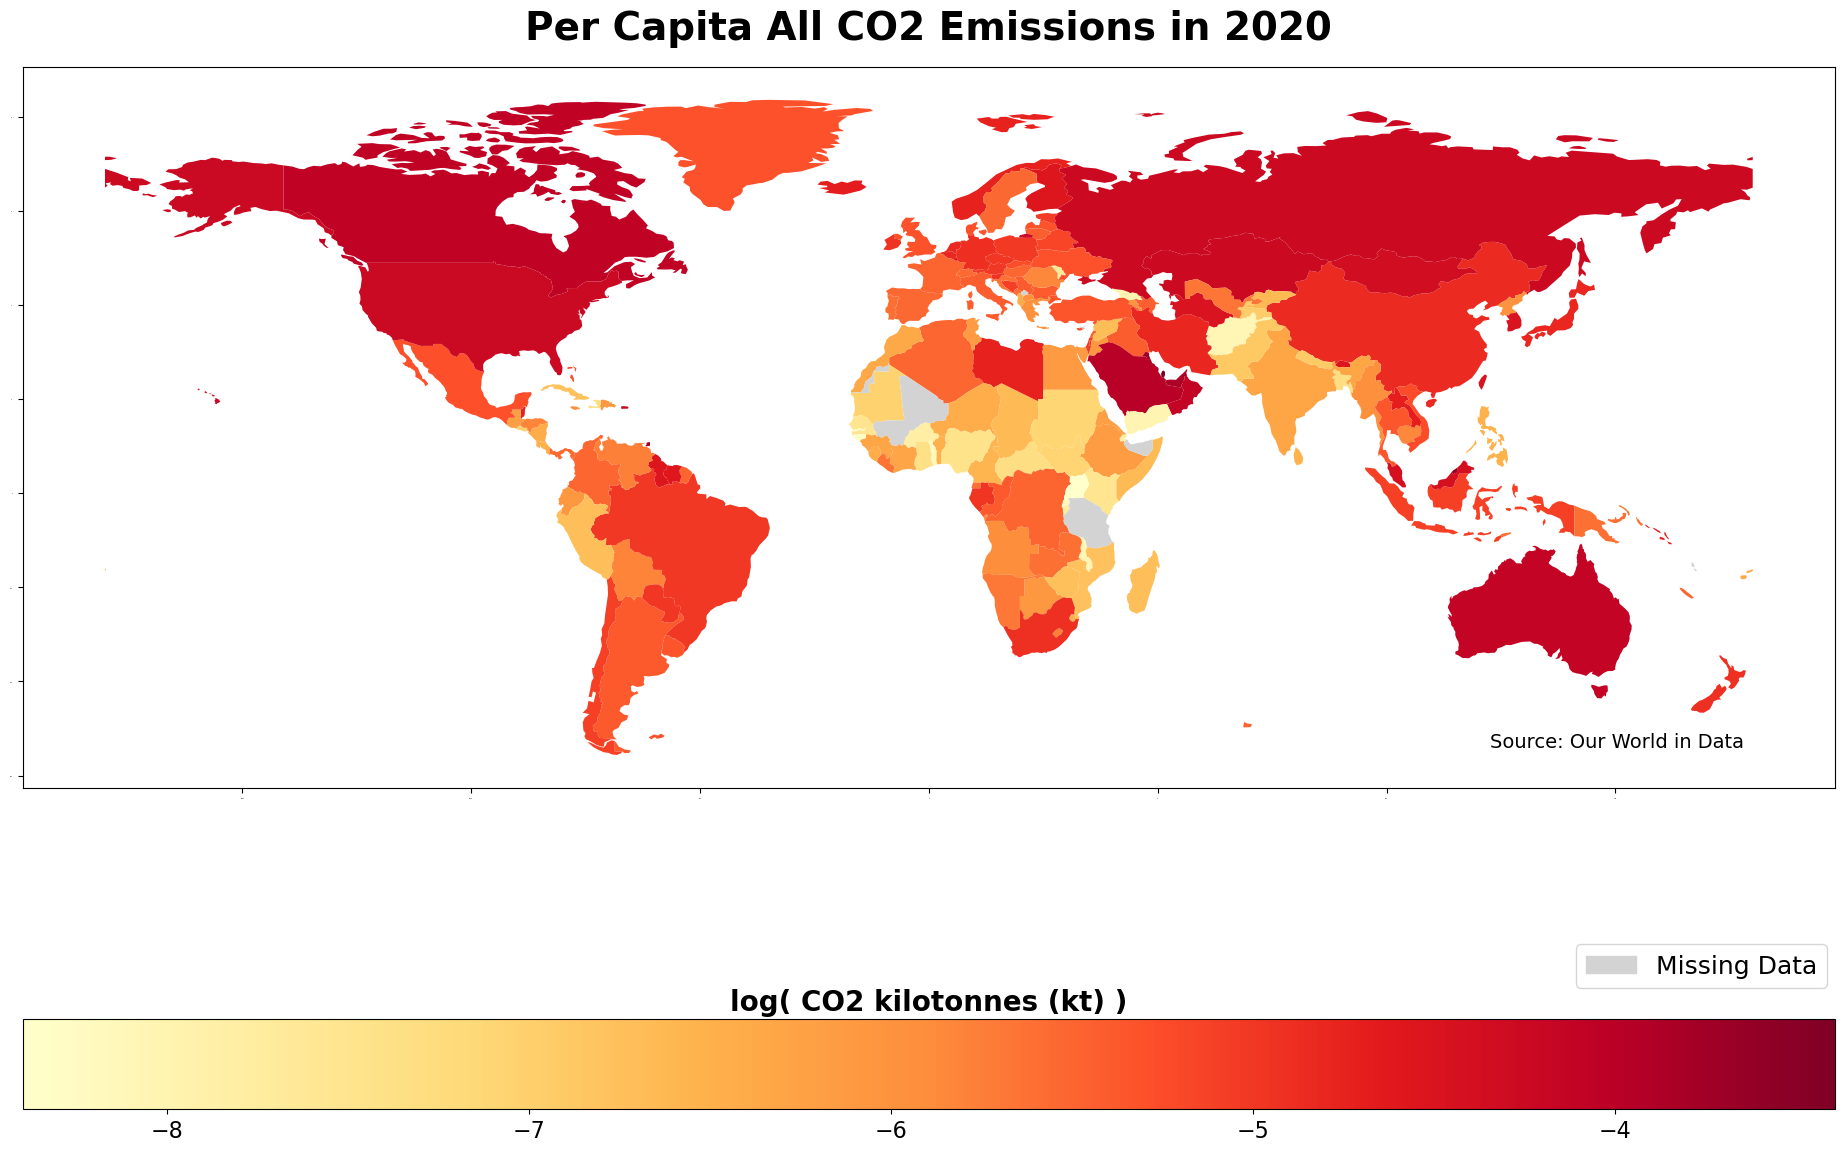

In [172]:
fig, ax = plt.subplots(1, 1, figsize=(25, 20))

# Plotting the data with the custom colormap
merged_owid.plot(column="log_co2_including_luc_per_capita", ax=ax, legend=True,
                cmap=cmap,
                legend_kwds={'label': "",
                             'orientation': "horizontal"},
                missing_kwds={'color': 'lightgrey'})

plt.title("Per Capita All CO2 Emissions in 2020", fontsize=28, fontweight='bold', pad=20)

# increase size of x and y ticks
ax.tick_params(axis='x', which='major', labelsize=0)
ax.tick_params(axis='y', which='major', labelsize=0)


# Adding axis labels for latitude and longitude
ax.set_xlabel('', fontsize=20)
ax.set_ylabel('', fontsize=20)

ax.text(0.95, 0.05, 'Source: Our World in Data', 
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=14)

cbar = ax.get_figure().get_axes()[1]
cbar.set_title("log( CO2 kilotonnes (kt) )", fontsize=20, fontweight='bold')
cbar.tick_params(labelsize=16)  # Set the size as needed
    
# Create a patch for the missing data
missing_data_patch = mpatches.Patch(color='lightgrey', label='Missing Data')

# Adjust the subplot parameters to leave space for the outside legend
fig.subplots_adjust(right=0.85)

# Create a legend for the missing data patch
# Adjust the bbox_to_anchor values to place the legend outside the figure
legend = ax.legend(handles=[missing_data_patch], labels=['Missing Data'], 
                   loc='upper left', bbox_to_anchor=(.85, -.2), fontsize=18)

plt.savefig('plots/per_cap_all_co2_emissions.png', bbox_inches='tight')


In [173]:
merged_fao_adjusted = merged_fao[merged_fao["per_capita_emission"] <= merged_owid["co2_including_luc_per_capita"].max()]

In [174]:
# take log transform of per_capita_emission
merged_fao_adjusted = merged_fao_adjusted.copy()
merged_fao_adjusted["per_capita_emission"] = merged_fao_adjusted["per_capita_emission"].apply(lambda x: np.nan if x <= 0 else x)
merged_fao_adjusted["log_per_capita_emission"] = np.log(merged_fao_adjusted["per_capita_emission"])


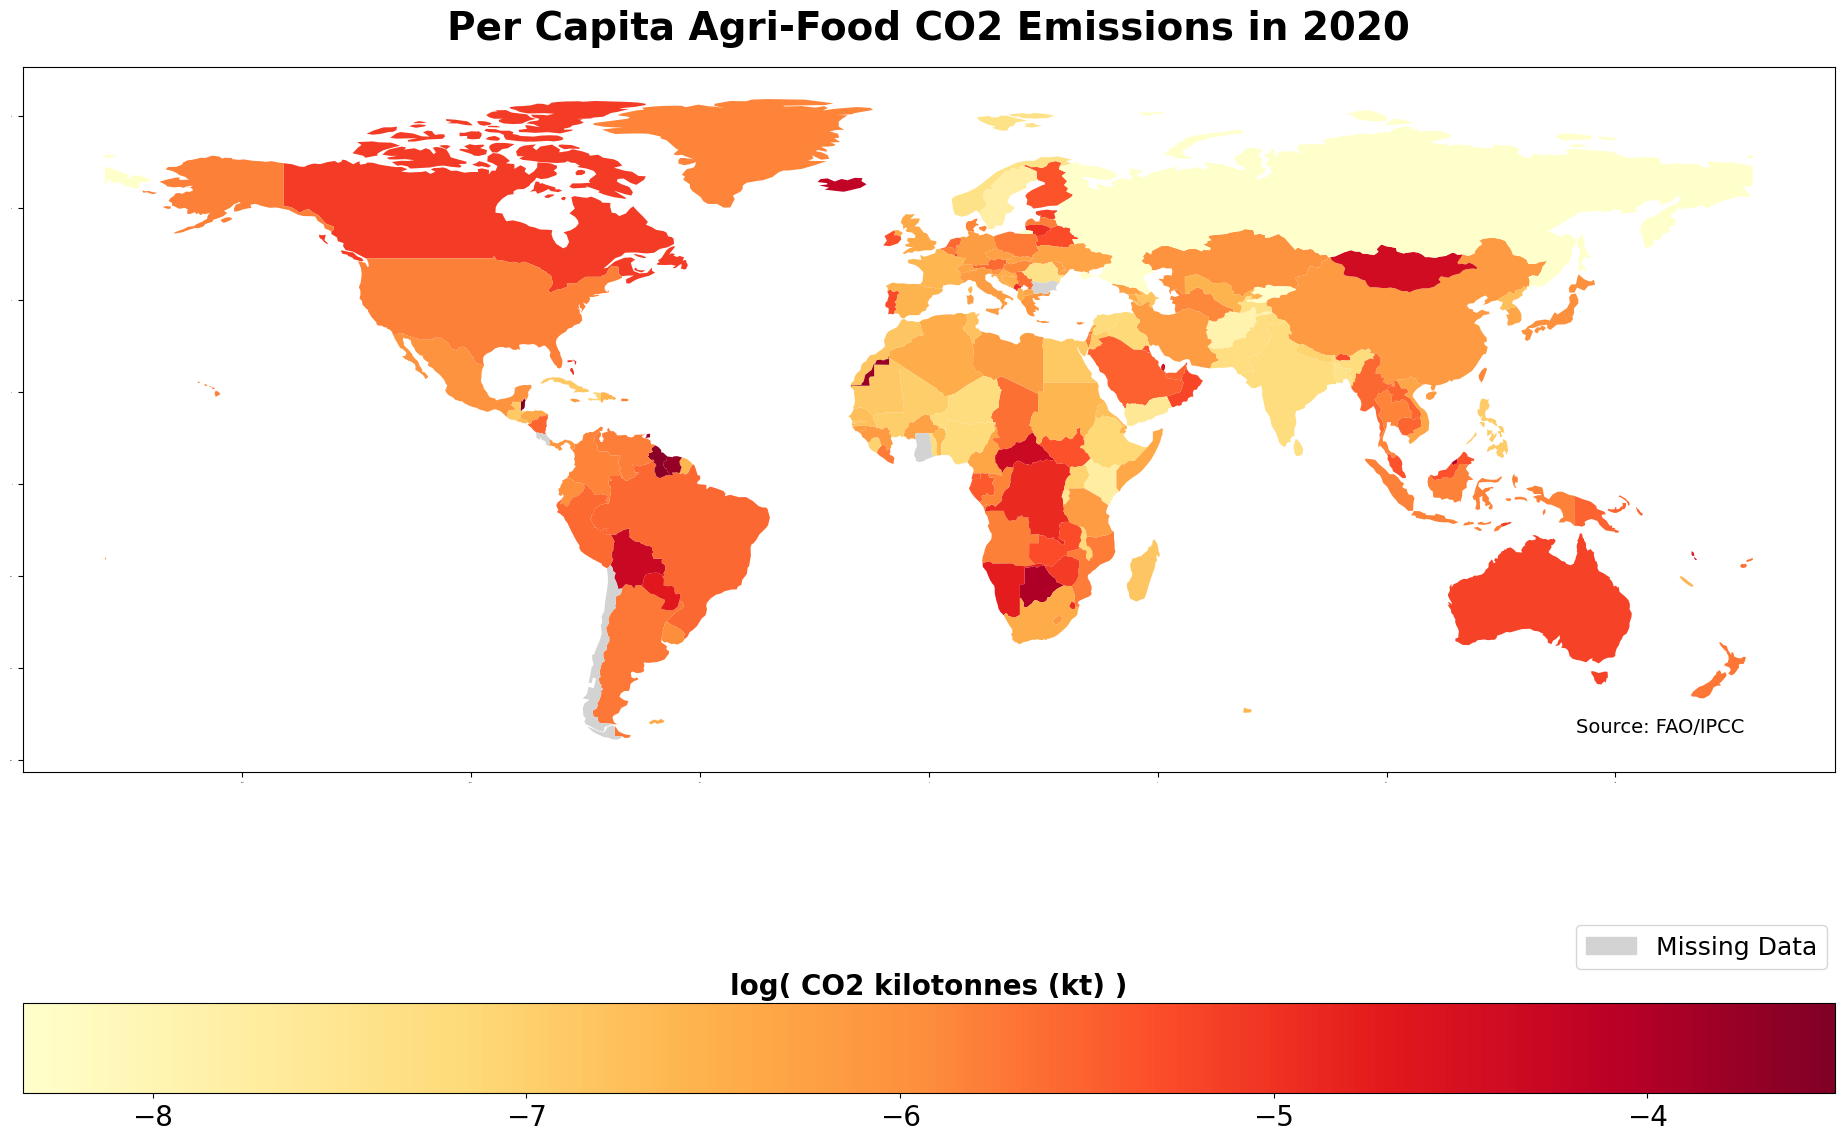

In [175]:

fig, ax = plt.subplots(1, 1, figsize=(25, 20))
cmap = 'YlOrRd'

# Plotting the data with the custom colormap
merged_fao_adjusted.plot(column="log_per_capita_emission", ax=ax, legend=True,
                cmap=cmap,
                legend_kwds={'label': "",
                             'orientation': "horizontal"},
                missing_kwds={'color': 'lightgrey'})

plt.title("Per Capita Agri-Food CO2 Emissions in 2020", fontsize=28, fontweight='bold', pad=20)

# increase size of x and y ticks
ax.tick_params(axis='x', which='major', labelsize=0)
ax.tick_params(axis='y', which='major', labelsize=0)


# Adding axis labels for latitude and longitude
ax.set_xlabel('')
ax.set_ylabel('')

ax.text(0.95, 0.05, 'Source: FAO/IPCC', 
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=14)


cbar = ax.get_figure().get_axes()[1]
cbar.set_title("log( CO2 kilotonnes (kt) )", fontsize=20, fontweight='bold')
cbar.tick_params(labelsize=20)  # Set the size as needed
    
# Create a patch for the missing data
missing_data_patch = mpatches.Patch(color='lightgrey', label='Missing Data')

# Adjust the subplot parameters to leave space for the outside legend
fig.subplots_adjust(right=0.85)

# Create a legend for the missing data patch
# Adjust the bbox_to_anchor values to place the legend outside the figure
legend = ax.legend(handles=[missing_data_patch], labels=['Missing Data'], 
                   loc='upper left', bbox_to_anchor=(.85, -.2), fontsize=18)

# If you have a colorbar, you can adjust its position using colorbar.set_position()
plt.savefig('plots/per_cap_agrifood_co2_emissions.png', bbox_inches='tight')

In the realm of total emissions, China and India are prominent due to their substantial industrial activities. However, when these emissions are assessed on a per capita basis, their impact appears comparatively mitigated, a consequence of their large population sizes. Conversely, the United States and Russia exhibit significantly higher per capita emissions relative to other countries, particularly in overall emissions compared to agri-food. This disparity is likely attributable to their industrialized economies, which are heavily reliant on fossil fuel consumption and energy-intensive industries.

Countries such as Australia and Canada demonstrate elevated per capita emissions in both agri-food and total CO2 categories. This trend is reflective of their high living standards, which entail energy-intensive lifestyles, and their economies' strong dependence on resource-intensive agricultural and industrial sectors.

In the case of nations like Qatar, Brunei, Kuwait, Saudi Arabia, and Oman, the per capita total CO2 emissions are exceptionally high. This is predominantly due to their relatively smaller populations combined with substantial oil production, a sector known for its high carbon emissions. Trinidad and Tobago, which ranks as the third-highest per capita emitter, presents a similar scenario where the emissions are predominantly driven by the energy sector, particularly natural gas and petrochemical industries. These examples underscore the significant impact that industrial and energy sectors have on the per capita CO2 emissions of a country, particularly in regions where these activities are the mainstay of the economy.

In [176]:
#merged_owid.sort_values(by = "co2_including_luc_per_capita", ascending=False).head(10)

## Vulnerability

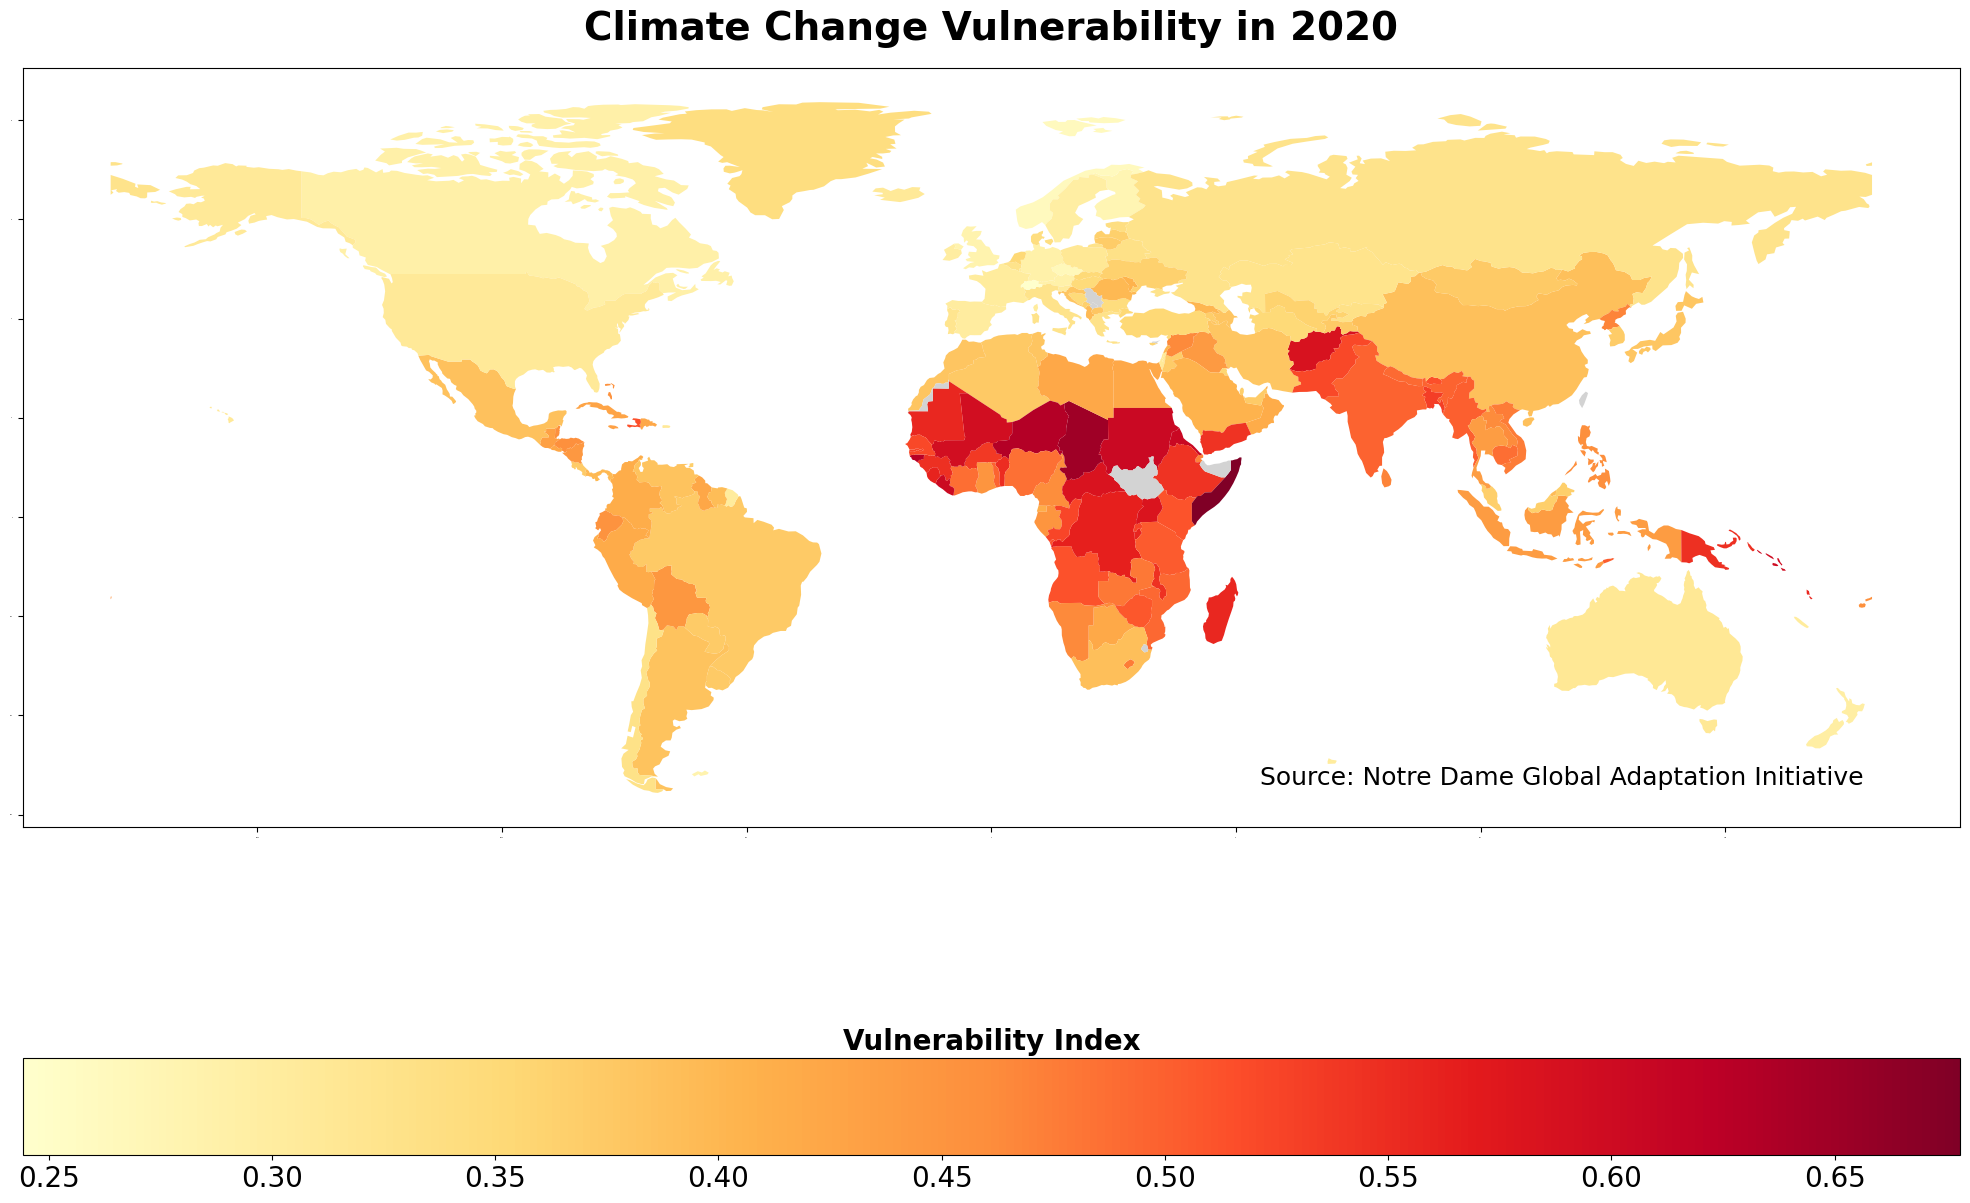

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(25, 20))

# Using the YlOrRd colormap
cmap = 'YlOrRd'

# Plotting the data with the YlOrRd colormap
merged_vulnerability.plot(column="2020", ax=ax, legend=True,
                          cmap=cmap,
                          legend_kwds={'label': "",
                                       'orientation': "horizontal"},
                                       missing_kwds={'color': 'lightgrey'})

ax.tick_params(axis='x', which='major', labelsize=0)
ax.tick_params(axis='y', which='major', labelsize=0)

# Find the colorbar object and adjust its label size
cbar = ax.get_figure().get_axes()[1]
cbar.set_title("Vulnerability Index", fontsize=20, fontweight='bold')
cbar.tick_params(labelsize=20)  

plt.title("Climate Change Vulnerability in 2020", fontsize=28, fontweight='bold', pad=20)

ax.text(0.95, 0.05, 'Source: Notre Dame Global Adaptation Initiative', 
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='black', fontsize=18)


plt.savefig('plots/global_cc_vulnerability.png', bbox_inches='tight')
plt.show()

The relationship between a country's CO2 emissions and its vulnerability to climate change is not straightforward. For instance, high-emission countries like the United States, China, and several European nations may exhibit a lower susceptibility to climate change impacts, primarily due to their stronger adaptive capacities. These nations typically have advanced infrastructure and resources that enable them to implement effective climate change mitigation and adaptation strategies. In contrast, many African countries, along with certain regions in South Asia and parts of Latin America, despite their relatively lower CO2 emissions, are often more vulnerable to the adverse effects of climate change. This heightened vulnerability can be attributed to a range of factors, including limited economic resources, governance challenges, underdeveloped healthcare systems, and restricted access to technology. Their lower adaptive capacity exacerbates the impacts of climate change.

The disparity between the contributors to climate change and those most affected by it is a critical global issue. To address this, a new fund of $549 million has been proposed to aid vulnerable countries impacted by climate disasters. This initiative, endorsed by diplomats from nearly 200 countries at a United Nations global warming summit, represents a step towards addressing the climate inequity. However, the anticipated climate-related costs for developing countries are projected to be between $280 billion and $580 billion annually by 2030, underscoring the urgent need for comprehensive support, targeted policies, and increased climate adaptation funding for these regions

## Bar plots
* Code Originator: Hanlin
* Code Reviewer: Chloe
* Code Reviser: Isa

#### Top 10 Emitters in 2020

In [178]:
fao_filtered = fao_df[fao_df['Area']!='china, mainland']

In [179]:
# Create a copy of the DataFrame if fao_filtered is a slice of another DataFrame
fao_filtered = fao_filtered.copy()
fao_filtered.loc[:, 'Area'] = fao_filtered['Area'].str.title()
fao_filtered.loc[:, 'Area'] = fao_filtered['Area'].replace({'United States Of America':'USA', 'Democratic Republic Of The Congo':'DR Congo'})


In [180]:
latest_year = fao_filtered['Year'].max()
data_latest_year = fao_filtered[fao_filtered['Year'] == latest_year].copy()


In [181]:
top_emitters_2020 = data_latest_year.groupby('Area')['total_emission'].sum().sort_values(ascending=False).head(10)
print(top_emitters_2020)

Area
China        3.115114e+06
USA          1.023694e+06
India        9.754658e+05
Brazil       8.149279e+05
Indonesia    8.063052e+05
DR Congo     6.987762e+05
Japan        3.201396e+05
Mexico       3.051357e+05
Canada       2.321697e+05
Thailand     2.095367e+05
Name: total_emission, dtype: float64


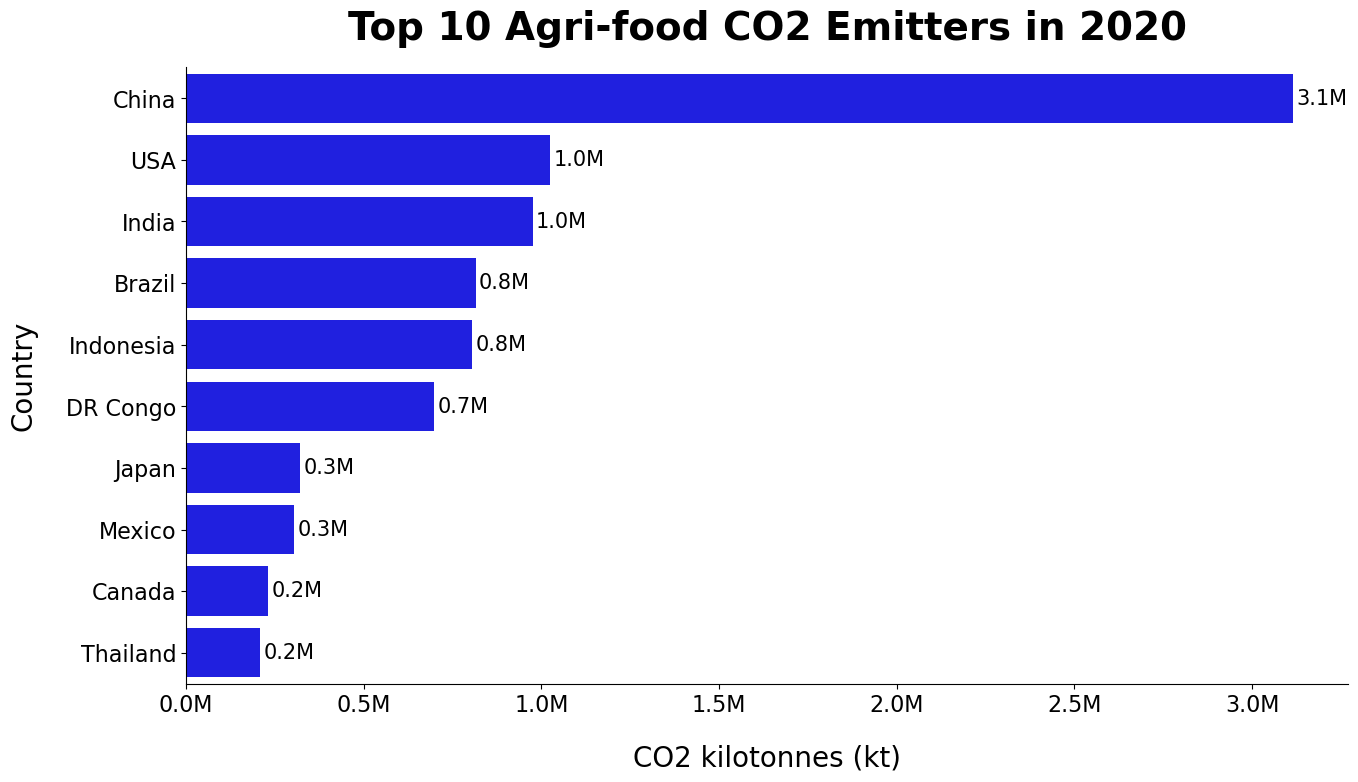

In [182]:
# Plot
import matplotlib.ticker as ticker
plt.figure(figsize=(15, 8))
barplot = sns.barplot(x=top_emitters_2020.values, y=top_emitters_2020.index, color='blue')
plt.title(f'Top 10 Agri-food CO2 Emitters in {latest_year}', fontweight = "bold", fontsize=28,  pad=20)
plt.xlabel('CO2 kilotonnes (kt)', fontsize=20, labelpad=20)
plt.ylabel('Country', fontsize=20, labelpad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Function to format the x-axis labels
def millions_formatter(x, pos=None):
    return f'{x / 1e6:.1f}M'

# Apply the formatter
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

# Adding the text on each bar
for p in barplot.patches:
    width = p.get_width()    # get bar length
    formatted_width = millions_formatter(width)  # format the width using the millions formatter
    plt.text(width + 10000,      # set the text at 1 unit right of the bar
             p.get_y() + p.get_height() / 2, # get Y coordinate + half of bar height
             formatted_width, # use the formatted value
             ha = 'left',    # horizontal alignment
             va = 'center',  # vertical alignment
             fontsize = 15)

# get rif of top and y axis spines
sns.despine()

plt.savefig('plots/top_10_agrifood_emitters_2020.png')

#plt.savefig('plots/Top 10 CO2 Emitters in 2020')
plt.show()

### Per Capita

In [183]:
# Data filtering - filter the top 10 countries data
data_top_10 = data_latest_year[data_latest_year['Area'].isin(top_emitters_2020.index)].copy()

# Data manipulation using .loc
data_top_10.loc[:, 'Total Population'] = data_top_10['Total Population - Male'] + data_top_10['Total Population - Female']
data_top_10.loc[:, 'Per Capita Emissions'] = data_top_10["total_emission"] / data_top_10['Total Population']

# Proceed with your existing code for plotting
per_capita_emissions = data_top_10[['Area', 'Per Capita Emissions']]
sorted_per_capital_emissions = data_top_10.set_index('Area').reindex(top_emitters_2020.index)['Per Capita Emissions']


In [184]:
sorted_per_capital_emissions

Area
China        0.002138
USA          0.003047
India        0.000699
Brazil       0.003822
Indonesia    0.002966
DR Congo     0.007526
Japan        0.002556
Mexico       0.002422
Canada       0.006128
Thailand     0.002932
Name: Per Capita Emissions, dtype: float64

<Figure size 1500x800 with 0 Axes>

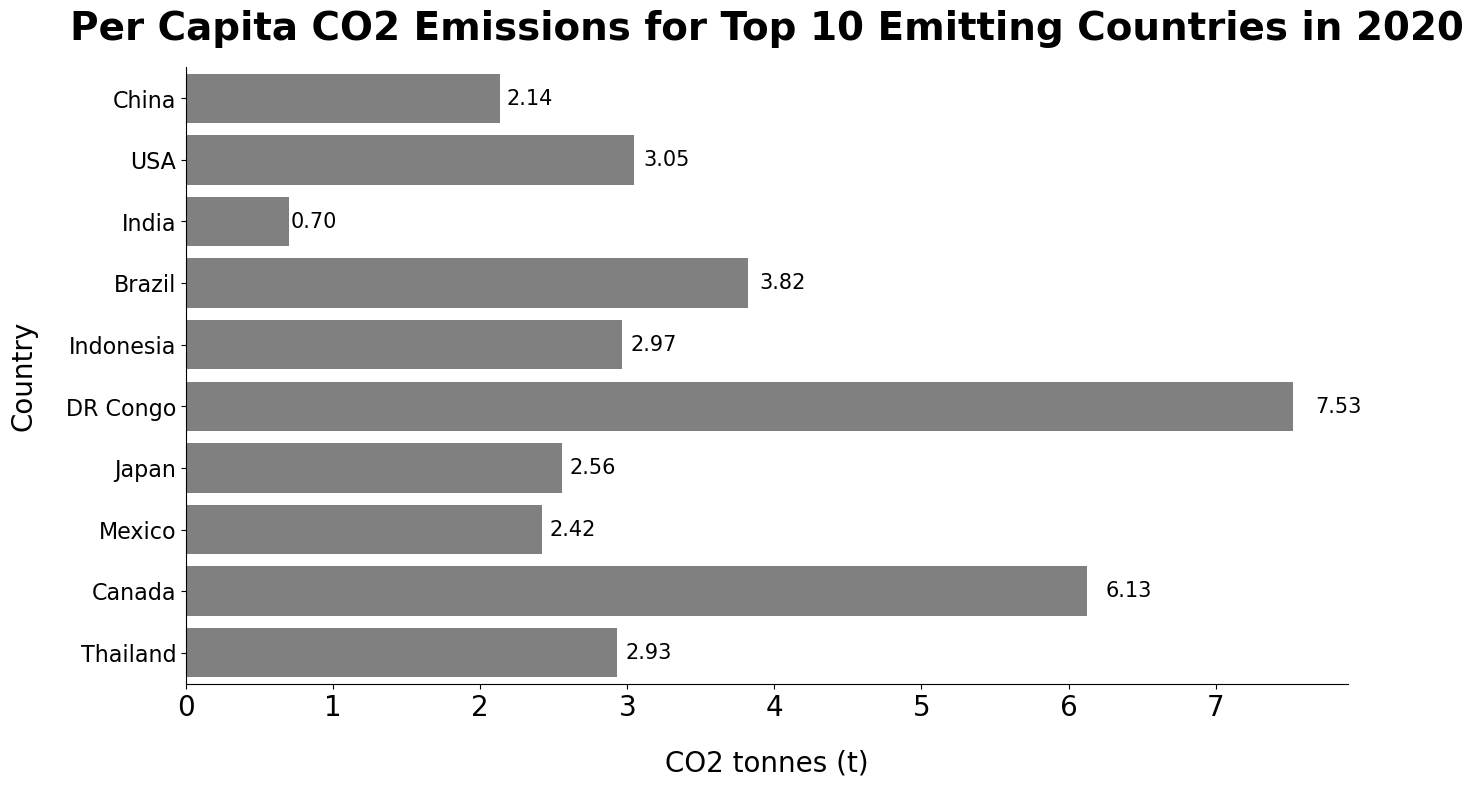

In [185]:
plt.figure(figsize=(15, 8))

# Multiply the data values by 1000
scaled_per_capita_emissions = sorted_per_capital_emissions * 1000

# Create the plot
plt.figure(figsize=(15, 8))
barplot = sns.barplot(x=scaled_per_capita_emissions, y=scaled_per_capita_emissions.index, color='grey')
plt.title('Per Capita CO2 Emissions for Top 10 Emitting Countries in 2020', fontweight="bold", fontsize=28, pad=20)
plt.xlabel('CO2 tonnes (t)', fontsize=20, labelpad=20)  # Updated label
plt.ylabel('Country', fontsize=20, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=16)

# Adding the text on each bar
for p in barplot.patches:
    width = p.get_width()  # get bar length
    offset = width * 0.02  # Offset proportional to the bar's width
    plt.text(width + offset,  # set the text at a proportional distance right of the bar
             p.get_y() + p.get_height() / 2,  # get Y coordinate + half of bar height
             f'{width:.2f}',  # format the value as an integer
             ha='left',        # horizontal alignment
             va='center',      # vertical alignment
             fontsize=15)

sns.despine()

plt.savefig('plots/per_cap_missions_top_emitters_2020.png')
plt.show()



### Growth in CO2 Emissions by Source 

In [186]:
#data = pd.read_csv('Agrofood_co2_emission.csv')
emission_sources_columns = fao_df.columns[2:-6]

# Calculating the sum of emissions for each source for the start and end of this period, excluding 'forestland'
emissions_start = fao_df[fao_df['Year'] == 1990][emission_sources_columns].sum()
emissions_end = fao_df[fao_df['Year'] == 2020][emission_sources_columns].sum()

# Calculating the growth rate for each source
growth_rates = (((emissions_end / emissions_start) ** (1/ 32))-1)*100
print(growth_rates)
# Sorting the growth rates to find the source with the highest growth
fastest_growing_sources = growth_rates.sort_values(ascending=False)

Savanna fires                     -0.718072
Forest fires                       0.081119
Crop Residues                      1.174301
Rice Cultivation                   0.188405
Drained organic soils (CO2)        0.311644
Pesticides Manufacturing           1.093207
Food Transport                     1.515573
Forestland                        -0.463088
Net Forest conversion             -1.138010
Food Household Consumption         3.526391
Food Retail                        3.418980
On-farm Electricity Use            2.619701
Food Packaging                     2.407573
Agrifood Systems Waste Disposal    0.806409
Food Processing                    0.888805
Fertilizers Manufacturing          1.198088
IPPU                               4.008850
Manure applied to Soils            0.272299
Manure left on Pasture             0.885416
Manure Management                  0.183569
Fires in organic soils            -5.251898
Fires in humid tropical forests    0.201341
On-farm energy use              

In [187]:
# Define abbreviations
abbreviations = {
    'Savanna fires': 'Sav. Fires',
    'Forest fires': 'Forest Fires',
    'Crop Residues': 'Crop Res.',
    'Rice Cultivation': 'Rice Cult.',
    'Drained organic soils (CO2)': 'Drained Org. Soils',
    'Pesticides Manufacturing': 'Pesticides Mfg.',
    'Food Transport': 'Food Trans.',
    'Forestland': 'Forestland',
    'Net Forest conversion': 'Net Forest Conv.',
    'Food Household Consumption': 'Food Hshld. Cons.',
    'Food Retail': 'Food Retail',
    'On-farm Electricity Use': 'On-farm Elec.',
    'Food Packaging': 'Food Pack.',
    'Agrifood Systems Waste Disposal': 'Agrifood Waste Disp.',
    'Food Processing': 'Food Proc.',
    'Fertilizers Manufacturing': 'Fertilizers Mfg.',
    'IPPU': 'IPPU',
    'Manure applied to Soils': 'Manure to Soils',
    'Manure left on Pasture': 'Manure on Pasture',
    'Manure Management': 'Manure Mgmt.',
    'Fires in organic soils': 'Fires in Org. Soils',
    'Fires in humid tropical forests': 'Fires Humid Forests',
    'On-farm energy use': 'On-farm Energy',
    'Rural population': 'Rural Pop.',
    'Urban population': 'Urban Pop.'
}

# Apply abbreviations
fastest_growing_sources.index = fastest_growing_sources.index.map(abbreviations)


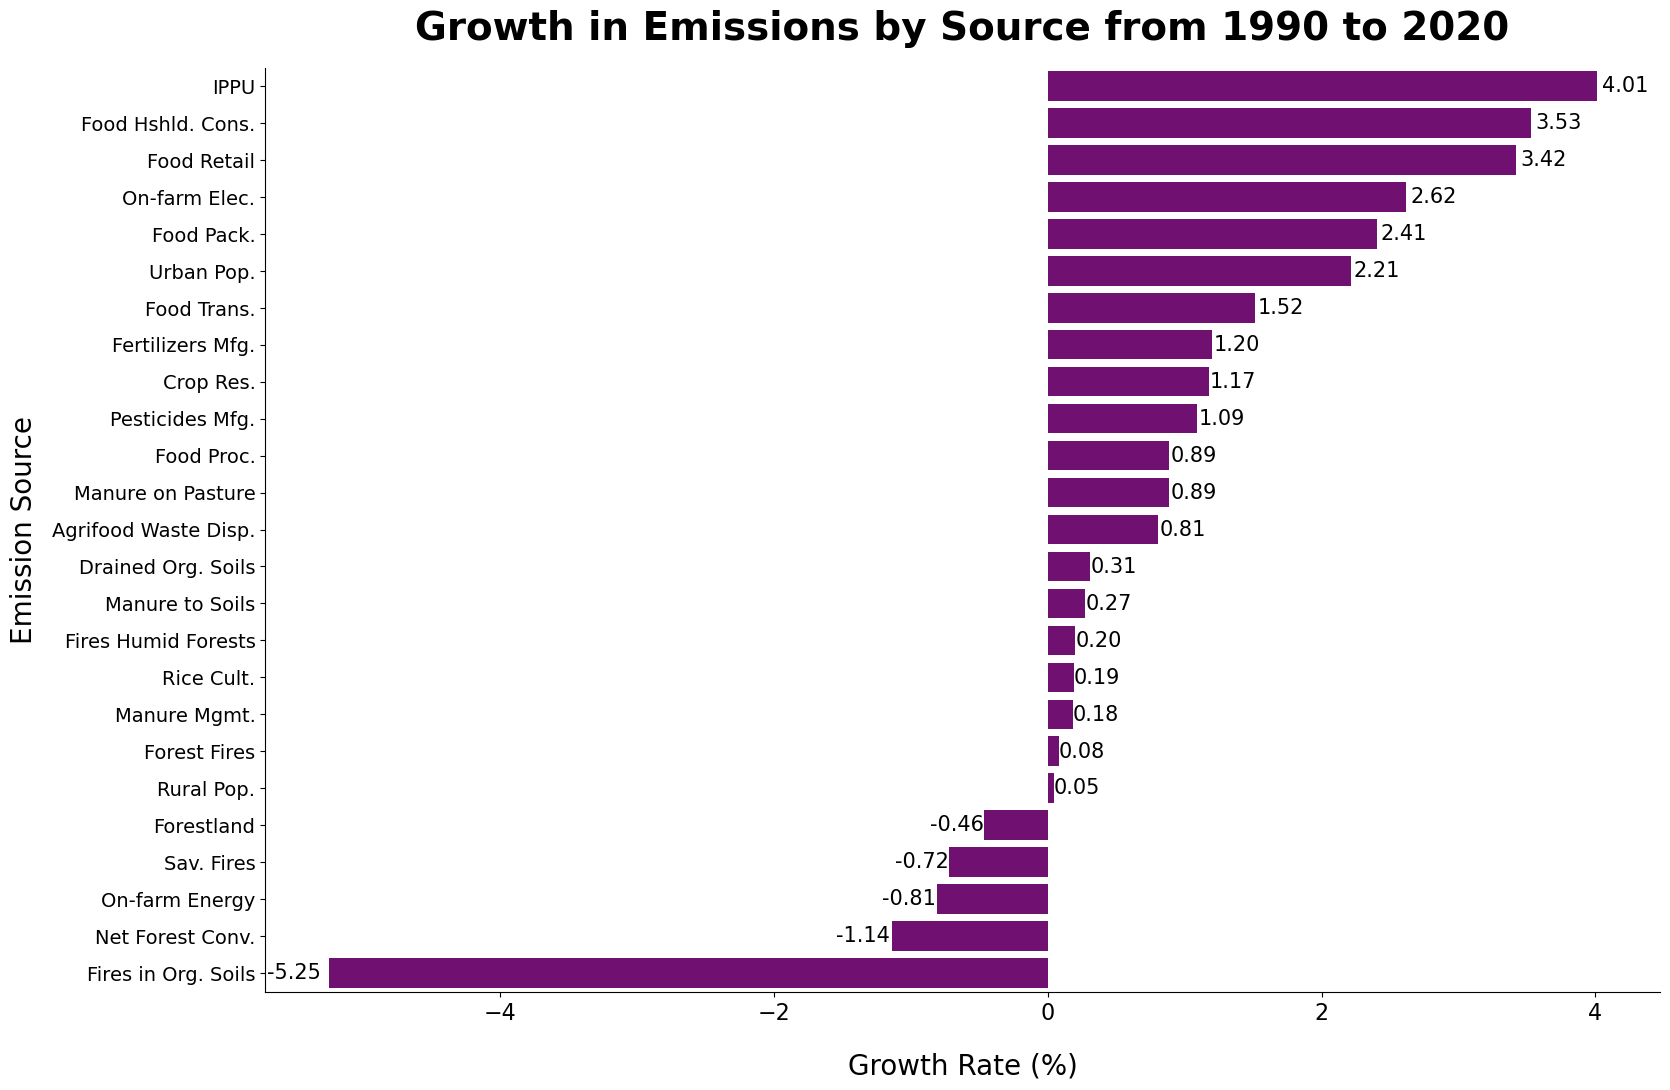

In [188]:
plt.figure(figsize=(18, 12))
barplot = sns.barplot(x=fastest_growing_sources.values, y=fastest_growing_sources.index, color='purple')
plt.title('Growth in Emissions by Source from 1990 to 2020', fontweight="bold", fontsize=28, pad=20)
plt.xlabel('Growth Rate (%)', fontsize=20, labelpad=20)
plt.ylabel('Emission Source', fontsize=20, labelpad=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
sns.despine()

# Adding text on each bar
for p in barplot.patches:
    width = p.get_width()  # get bar length
    label = f'{width:.2f}'  # format the value with two decimal places and add %

    if width >= 0:
        # For positive values, place text to the right of the bar
        plt.text(width + (width * 0.01),  # position to the right
                 p.get_y() + p.get_height() / 2, 
                 label, 
                 ha='left',  # left alignment
                 va='center', 
                 fontsize=15)
    else:
        # For negative values, place text to the left of the bar
        plt.text(width + (width * 0.01),  # position to the left
                 p.get_y() + p.get_height() / 2, 
                 label, 
                 ha='right',  # right alignment
                 va='center', 
                 fontsize=15)
plt.savefig('plots/growth_in_emissions_by_source_over_time.png')
plt.show()

### Time Series EDA

* Code Originator: Isa
* Code Reviewer: Nami
* Code Reviser: Chloe

In [189]:
fao_df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission', 'Average Temperature °C',
       'Population', 'per_capita_emission'],
      dtype='object')

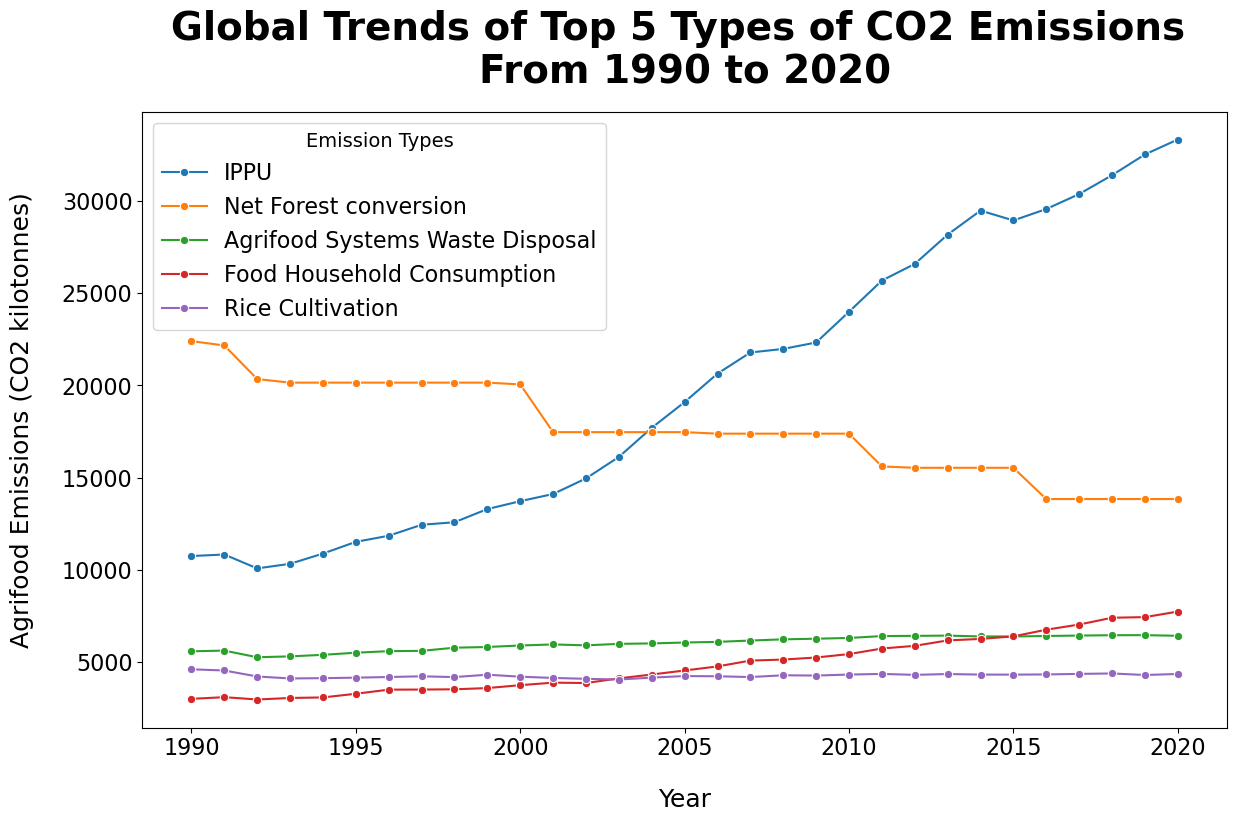

In [190]:
# Dropping non-emission related columns to focus on emission types
emission_types_data = fao_df.drop(columns=[
    'Area', 'Year', 'Rural population', 'Urban population',
    'Total Population - Male', 'Total Population - Female',
    'total_emission', 'Average Temperature °C', 'Population', 'per_capita_emission', 
])

# Calculating the total emissions for each type across all years
total_emissions_by_type = emission_types_data.sum().sort_values(ascending=False)

# Identifying the top 5 types of emissions
top_5_emission_types = total_emissions_by_type.head(5).index
top_5_emission_types_data = fao_df[['Year'] + top_5_emission_types.tolist()]


plt.figure(figsize=(14, 8))
for emission_type in top_5_emission_types:
    sns.lineplot(
        x='Year', y=emission_type, data=top_5_emission_types_data, 
        label=emission_type, marker='o', errorbar=None
    )

plt.title('Global Trends of Top 5 Types of CO2 Emissions \nFrom 1990 to 2020' , fontweight="bold", fontsize=28, pad=20)
plt.xlabel('Year', fontsize=18, labelpad=20)
plt.ylabel('Agrifood Emissions (CO2 kilotonnes)', fontsize=18, labelpad=20)
plt.legend(title='Emission Types',title_fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
plt.savefig('plots/Global_Trends_of_Top_5_Types_of_CO2_Emissions_From_1990_to_2020.png')
plt.show()


In [191]:
# Filtering the data
china_emission_data = fao_df[fao_df['Area'] == 'china']
brazil_emission_data = fao_df[fao_df['Area'] == 'brazil']

# Function to plot the top 5 emissions for a given country
def plot_top_5_emissions(country_data, country_name):
    # Dropping non-emission related columns
    emission_types = country_data.drop(columns=['Area', 'Year', 'Rural population', 'Urban population',
    'Total Population - Male', 'Total Population - Female',
    'total_emission', 'Average Temperature °C', 'Population', 'per_capita_emission'])
    # Total emissions for each type
    total_emissions_by_type = emission_types.sum().sort_values(ascending=False)
    top_5_emissions = total_emissions_by_type.head(5).index
    top_5_emissions_data = country_data[['Year'] + top_5_emissions.tolist()]

    # Plotting
    plt.figure(figsize=(14, 8))
    for emission_type in top_5_emissions:
        sns.lineplot(x='Year', y=emission_type, data=top_5_emissions_data, label=emission_type, marker='o')
    plt.title(f'Trends of Top 5 Types of CO2 Emissions in {country_name}', fontweight="bold", fontsize=28, pad=20)
    plt.xlabel('Year', fontsize=20, labelpad=20)
    plt.ylabel('Agrifood Emissions (CO2 kilotonnes)', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.rc('font', **{'size':'16'})
    plt.legend(title='Emission Types',title_fontsize=13, fontsize=12)
    plt.grid(False)
    plt.savefig(f'plots/Trends_of_Top_5_Types_of_CO2_Emissions_in_{country_name}.png')
    plt.show()
    

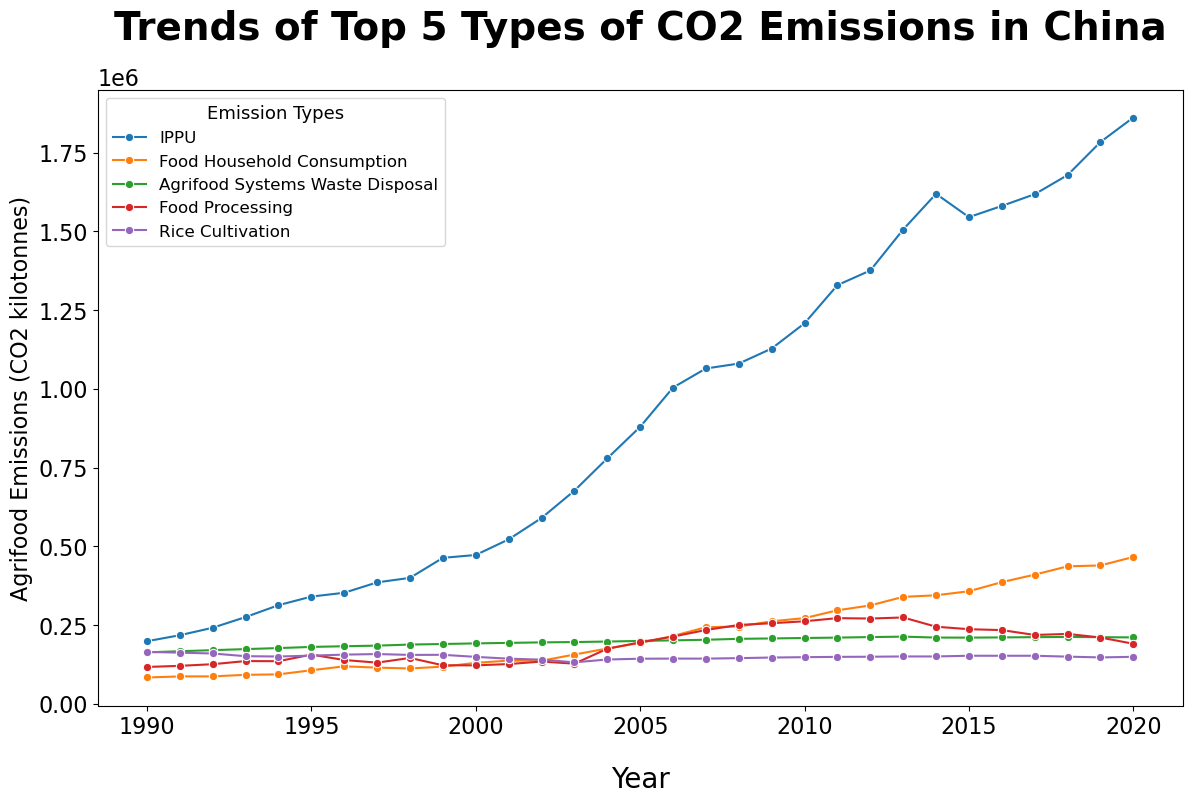

In [192]:
plot_top_5_emissions(china_emission_data, 'China')


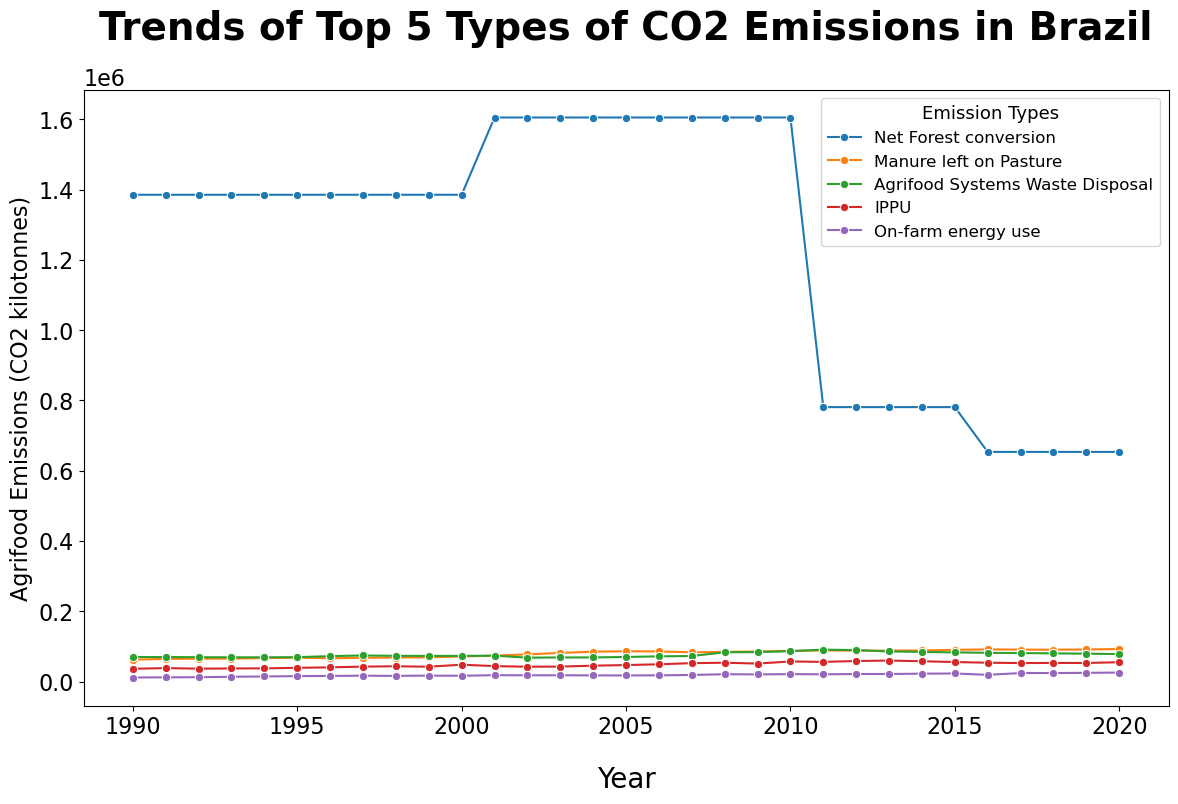

In [193]:
plot_top_5_emissions(brazil_emission_data, 'Brazil')

### Correlations EDA

* Code Originator: Nami
* Code Reviewer: Hanlin
* Code Reviser: Isa

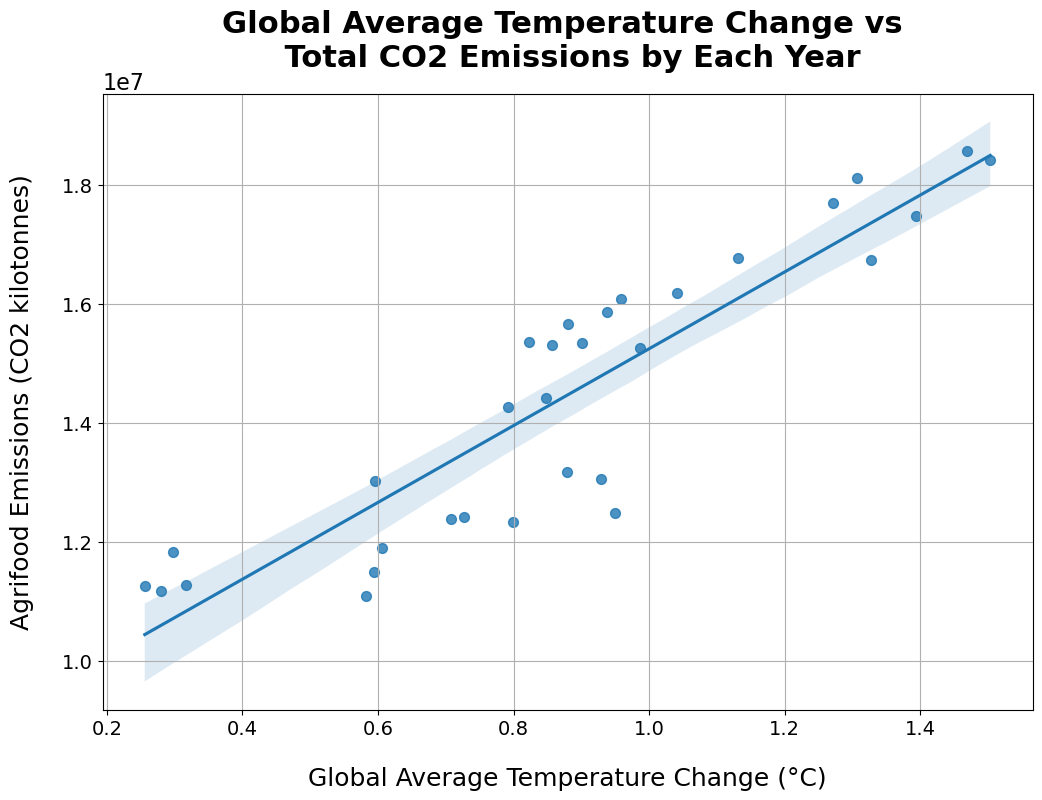

In [194]:
# Grouping data by year to calculate the global average temperature and total emissions
grouped_data = fao_df.groupby('Year').agg({'Average Temperature °C': 'mean', 'total_emission': 'sum'}).reset_index()

plt.figure(figsize=(12, 8))
# Scatter plot of Global Average Temperature Change vs Total Emission for each yearplt.
sns.regplot(x='Average Temperature °C', y='total_emission', data=grouped_data, scatter_kws={'s':50})
plt.title('Global Average Temperature Change vs \n Total CO2 Emissions by Each Year', fontweight="bold", fontsize=22, pad=20)
plt.xlabel('Global Average Temperature Change (°C)', fontsize=18, labelpad=20)
plt.ylabel('Agrifood Emissions (CO2 kilotonnes)', fontsize=18, labelpad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rc('font', **{'size':'16'})


plt.grid(True)
plt.savefig("plots/temp_change_vs_total_emission.png")
plt.show()

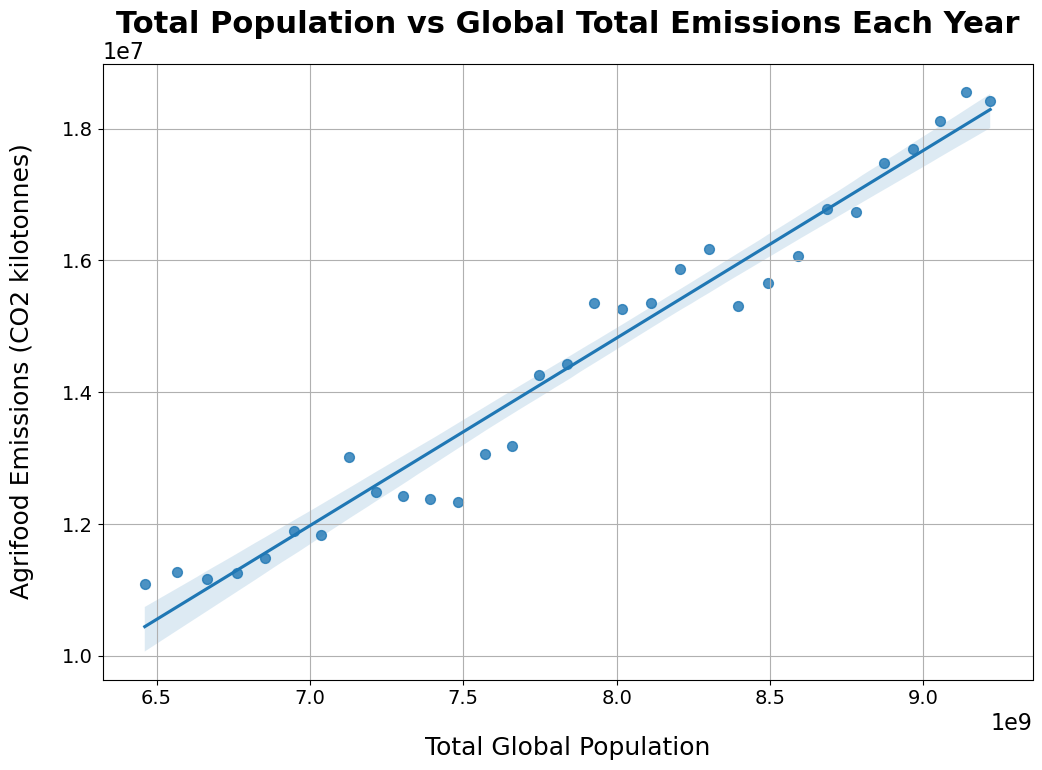

In [195]:
# Grouping the data by year to calculate total emissions and total population
grouped_data = fao_df.groupby('Year').agg({
    'total_emission': 'sum', 
    'Total Population - Male': 'sum', 
    'Total Population - Female': 'sum'
}).reset_index()

# Calculating total population and emissions per capita for each year
grouped_data['Total Population'] = grouped_data['Total Population - Male'] + grouped_data['Total Population - Female']
grouped_data['Emissions Per Capita'] = grouped_data['total_emission'] / grouped_data['Total Population']

# Plotting the result
plt.figure(figsize=(12, 8))
sns.regplot(x='Total Population', y='total_emission', data=grouped_data, scatter_kws={'s':50})
plt.title('Total Population vs Global Total Emissions Each Year', fontweight="bold", fontsize=22)
plt.xlabel('Total Global Population',  fontsize=18, labelpad=20)
plt.ylabel('Agrifood Emissions (CO2 kilotonnes)', fontsize=18, labelpad=20)
plt.rc('font', **{'size':'16'})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True)


plt.savefig("plots/global_total_emission_vs_total_pop.png")
plt.show()